# Accessing Data

In [11]:
#This gets us into the right directory from home, in order to run the import python script from Mat

#sys = system (module), gives information and control over python interpreter/terminal itself
import sys
sys.path.append("home/565/pv3484/aus_substation_electricity")

#% is a magic command, special shortcut command that lets you control/interact with notebook environment (ie. gives control of terminal without writing full python code)
%cd aus_substation_electricity/

!pwd

[Errno 2] No such file or directory: 'aus_substation_electricity/'
/home/565/pv3484/aus_substation_electricity
/home/565/pv3484/aus_substation_electricity


In [12]:
#This section imports the substations that Mat put together

%run /home/565/pv3484/aus_substation_electricity/import_substation.py

processing nsw substations for ['ausgrid'] from None to None
ausgrid
following columns in demand are not in info index:
['MT_HU', 'SI_NO']
removing these columns from demand
number of substations in ausgrid substation info: 134
number of substations in ausgrid substation data: 132
following sites match selection criteria:
               energy_asset          Name  Area  Dwellings  Persons  Residential  Commercial  Industrial  Primary Production  Education  \
ID                                                                                                                                        
BLAKE         AG_BLAKEHURST    Blakehurst     7      10081    28521        0.850       0.005       0.021               0.000      0.022   
PUNCH          AG_PUNCHBOWL     Punchbowl     9      17514    50395        0.826       0.048       0.038               0.000      0.025   
MEADO         AG_MEADOWBANK    Meadowbank    15      22420    56948        0.825       0.023       0.015               0

# Fixing the baseline to be the average demand for each hour of the 120 day period, stratifyed by hour
- 60 days , 30 +/- before and after public holiday
- 2 year interval = 120 days total
- Updated Anomaly plots

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.easter import easter
import os

def compare_holiday_only_window(demand, info, station, years, holiday_func, holiday_name,
                                save_dir=None):
    """
    Plot demand anomalies for a holiday (24-hour profile),
    using the ±30-day window around the holiday as baseline,
    stratified by hour of day.
    Plots even if data is missing (NaN values).
    
    Parameters
    ----------
    demand : DataFrame
        Demand time series with datetime index and station columns.
    info : DataFrame
        Metadata table with station names.
    station : str
        Station code (column in demand).
    years : list of int
        Years to analyze (e.g. [2004, 2005]).
    holiday_func : function
        Function(year) -> Timestamp of holiday date.
    holiday_name : str
        Name of the holiday for titles/labels.
    save_dir : str, optional
        Directory to save PNG plots. If None, plots are shown interactively.
    """
    
    # --- Prepare hourly demand data ---
    demand.index = pd.to_datetime(demand.index)
    hourly = demand[[station]].resample("h").mean()
    
    # --- Collect ±30-day windows around the holiday ---
    windows = []
    for year in years:
        ref_date = holiday_func(year)
        start = ref_date - pd.Timedelta(days=30)
        end   = ref_date + pd.Timedelta(days=30)
        window = hourly.loc[start:end].copy()
        windows.append(window)
    
    combined = pd.concat(windows)
    
    # --- Compute baseline stratified by hour ---
    combined["hour"] = combined.index.hour
    baseline_by_hour = combined.groupby("hour")[station].mean()
    
    # --- Compute anomalies relative to hour-specific baseline ---
    anomalies = combined.copy()
    anomalies["anomaly"] = anomalies[station] - anomalies["hour"].map(baseline_by_hour)
    
    # --- Extract holiday anomaly profile (24 hours) ---
    holiday_hours = []
    for year in years:
        ref_date = holiday_func(year)
        expected_hours = pd.date_range(ref_date, ref_date + pd.Timedelta(hours=23), freq="h")
        
        # Always reindex to 24 hours, filling missing values with NaN
        daily = anomalies["anomaly"].reindex(expected_hours)
        daily.index = range(24)
        
        holiday_hours.append(daily)
    
    # Average across years (NaN-safe)
    holiday_profile = pd.concat(holiday_hours, axis=1).mean(axis=1)
    
    # --- Plot ---
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(holiday_profile.index, holiday_profile.values, color="red", linewidth=2, marker="o",
            label=f"{holiday_name} (±30-Day Window)")
    
    ax.axhline(0, color="black", linewidth=1)
    ax.grid(axis='y', linestyle='-', linewidth=0.5, color='gray', alpha=0.3)
    ax.set_xticks(np.arange(0, 24, 1))
    ax.set_xticklabels([f"{h:02d}:00" for h in range(24)], rotation=45)
    
    full_name = info.loc[station, "Name"]
    ax.set_title(
        f"{full_name} Demand Anomaly: {holiday_name} ({years[0]}–{years[-1]}, ±30-Day Window)",
        fontsize=14
    )
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Electricity Demand Anomaly")
    ax.legend()
    fig.tight_layout()
    plt.show()

## Using function

✅ Plotted New Year's Day for [2004, 2005]


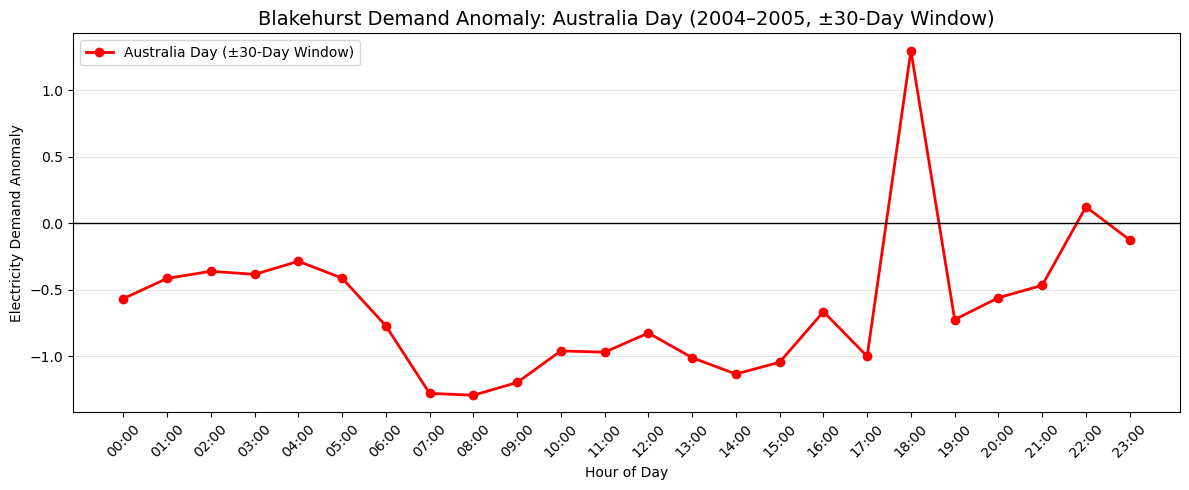

✅ Plotted Australia Day for [2004, 2005]


✅ Plotted Good Friday for [2004, 2005]


✅ Plotted Easter Saturday for [2004, 2005]


✅ Plotted Easter Sunday for [2004, 2005]


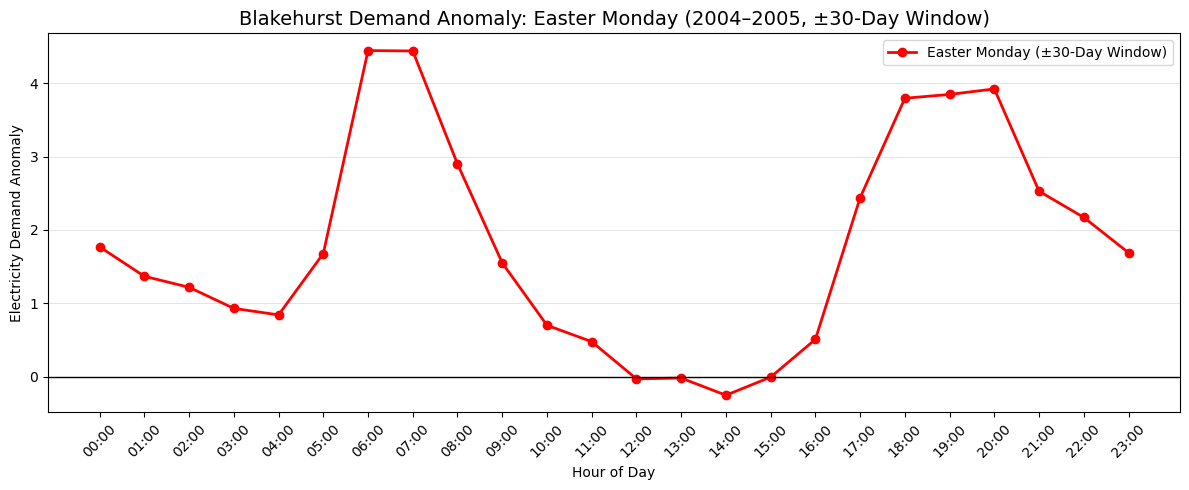

✅ Plotted Easter Monday for [2004, 2005]


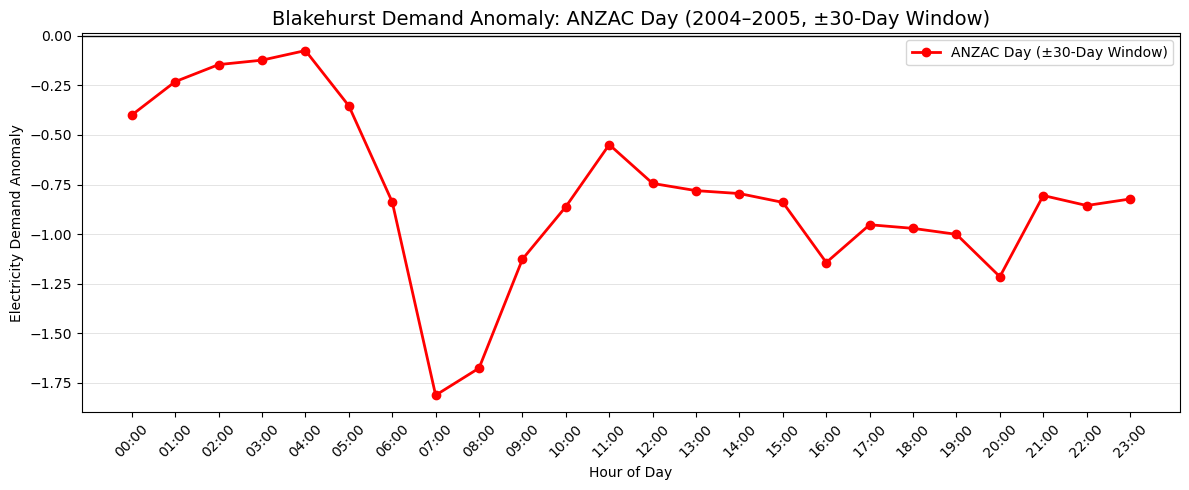

✅ Plotted ANZAC Day for [2004, 2005]


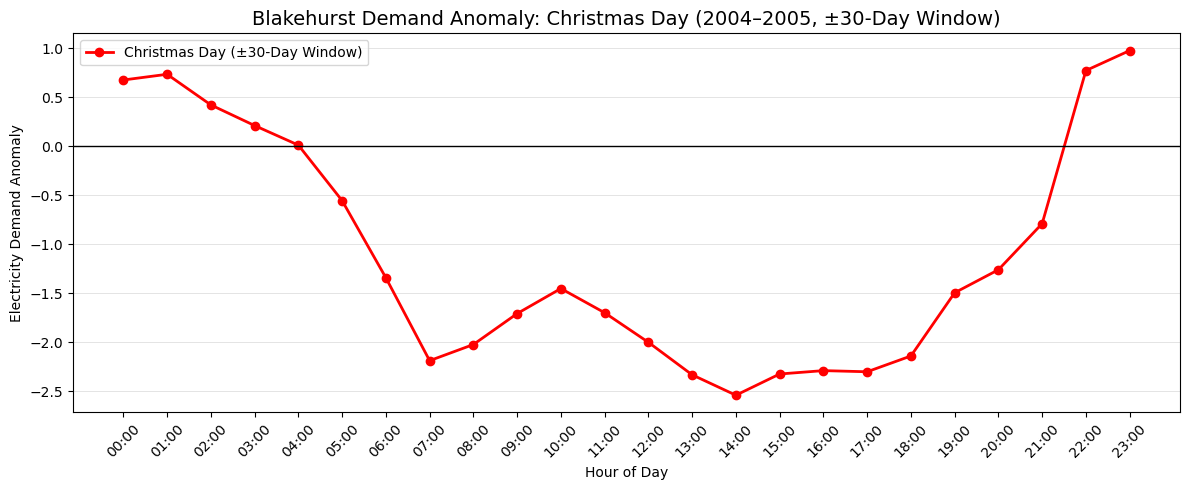

✅ Plotted Christmas Day for [2004, 2005]


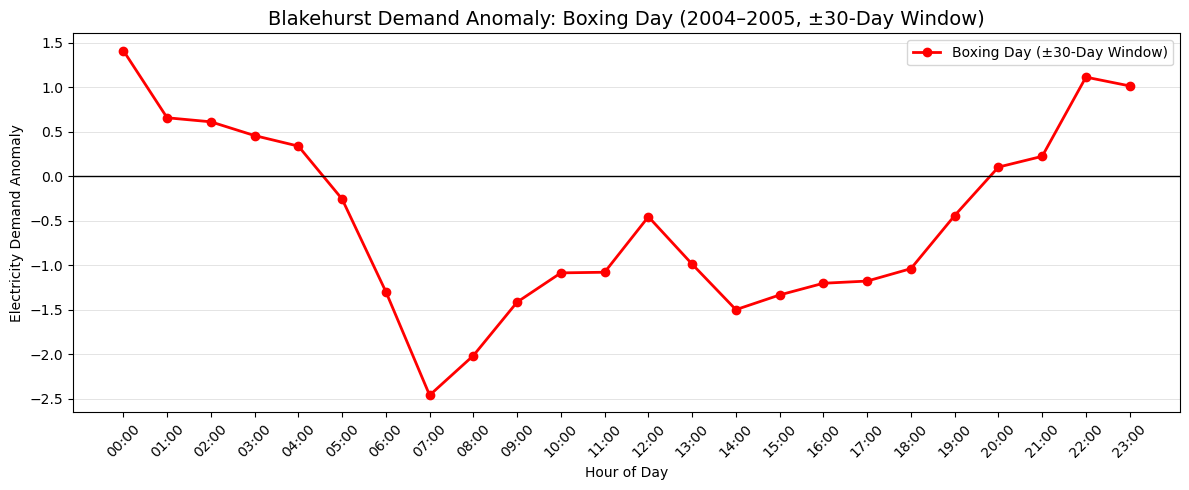

✅ Plotted Boxing Day for [2004, 2005]


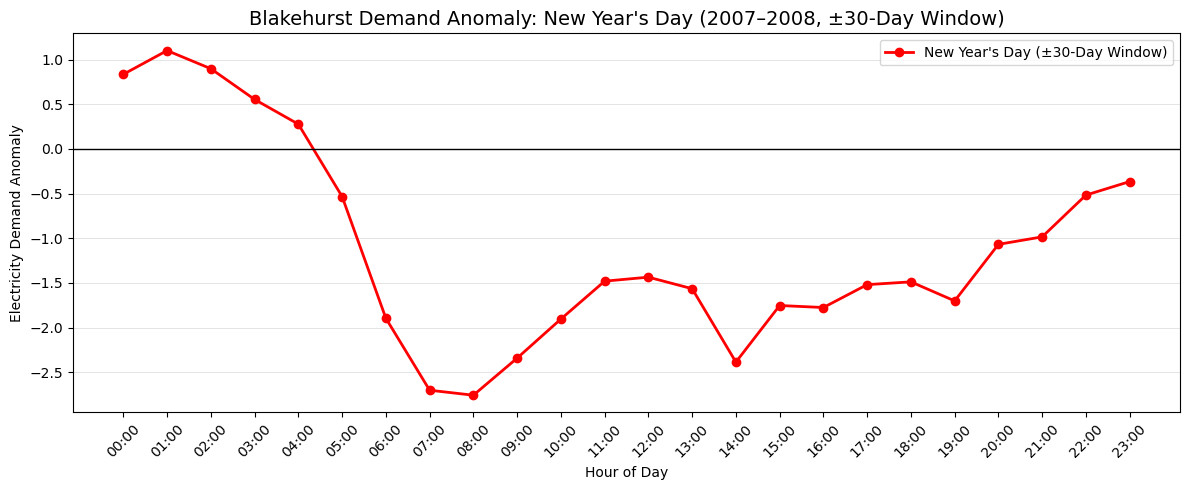

✅ Plotted New Year's Day for [2007, 2008]


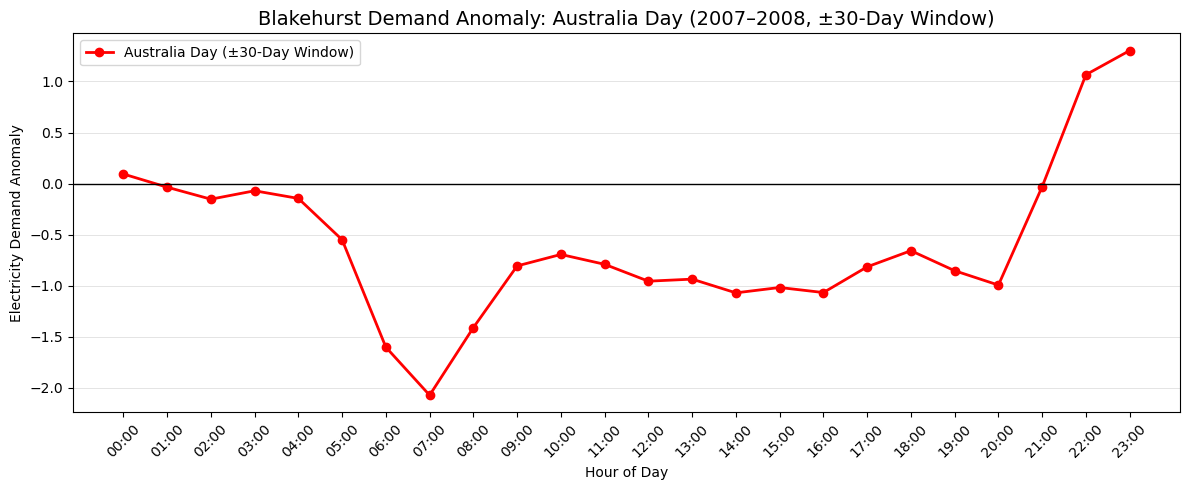

✅ Plotted Australia Day for [2007, 2008]


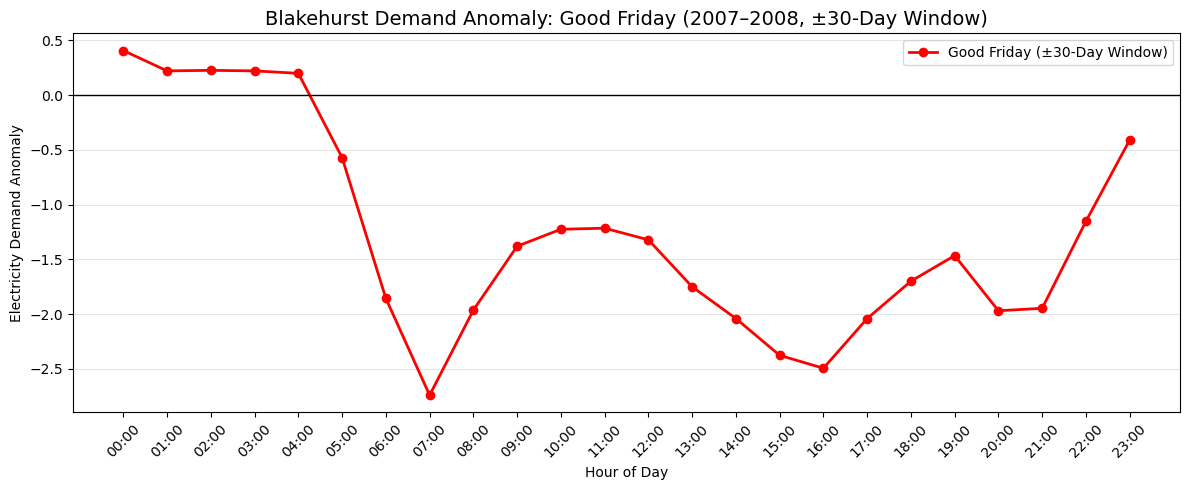

✅ Plotted Good Friday for [2007, 2008]


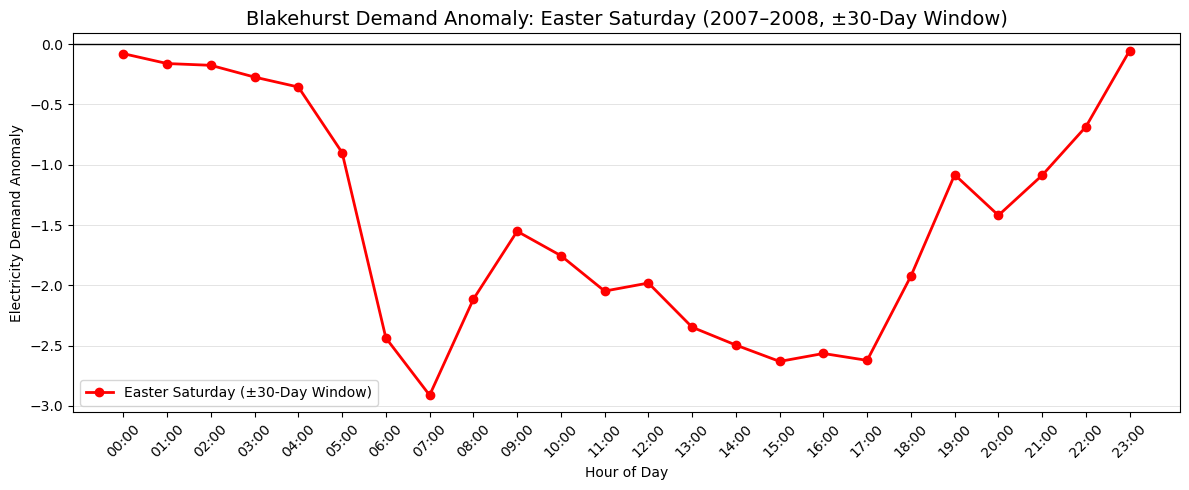

✅ Plotted Easter Saturday for [2007, 2008]


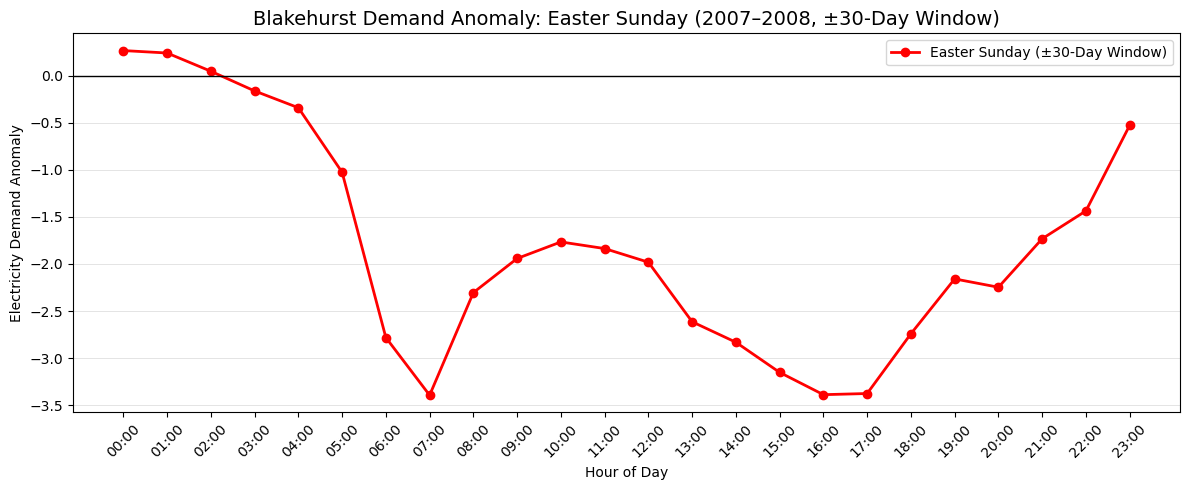

✅ Plotted Easter Sunday for [2007, 2008]


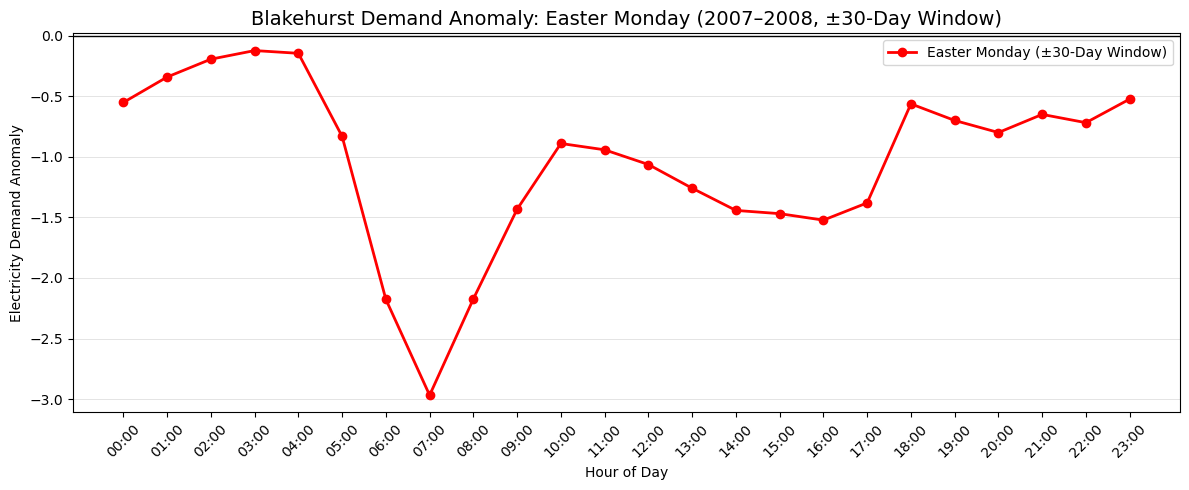

✅ Plotted Easter Monday for [2007, 2008]


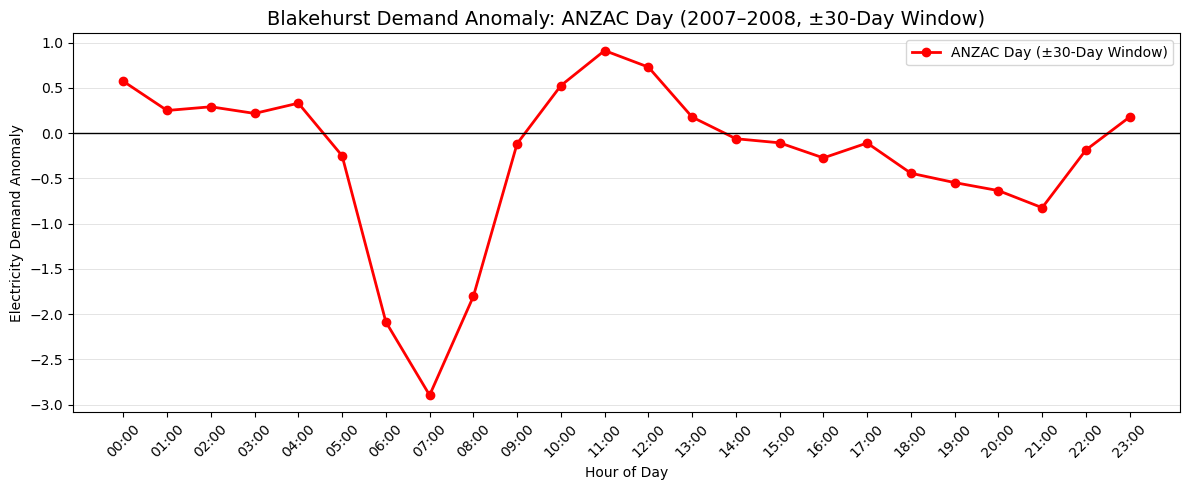

✅ Plotted ANZAC Day for [2007, 2008]


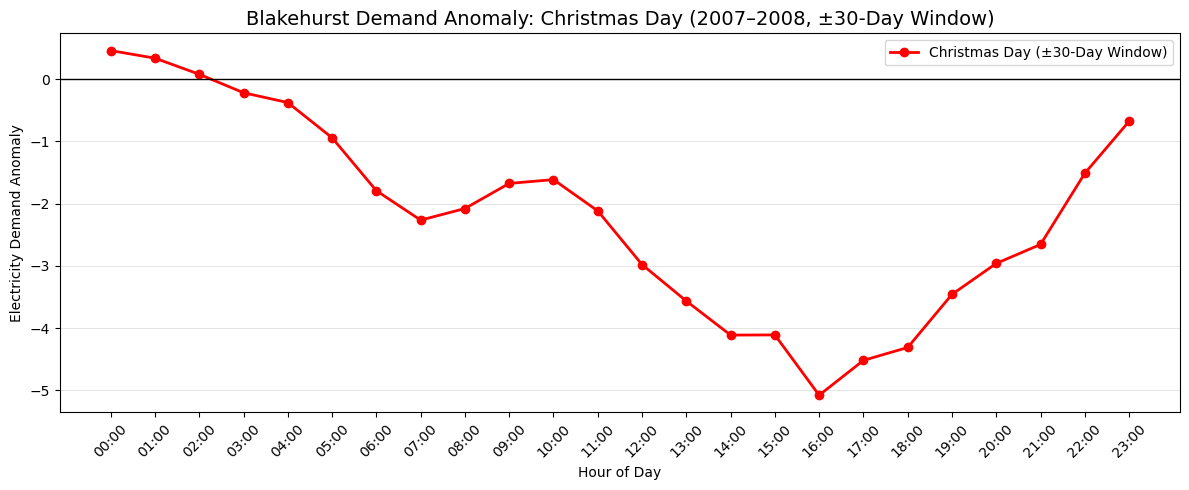

✅ Plotted Christmas Day for [2007, 2008]


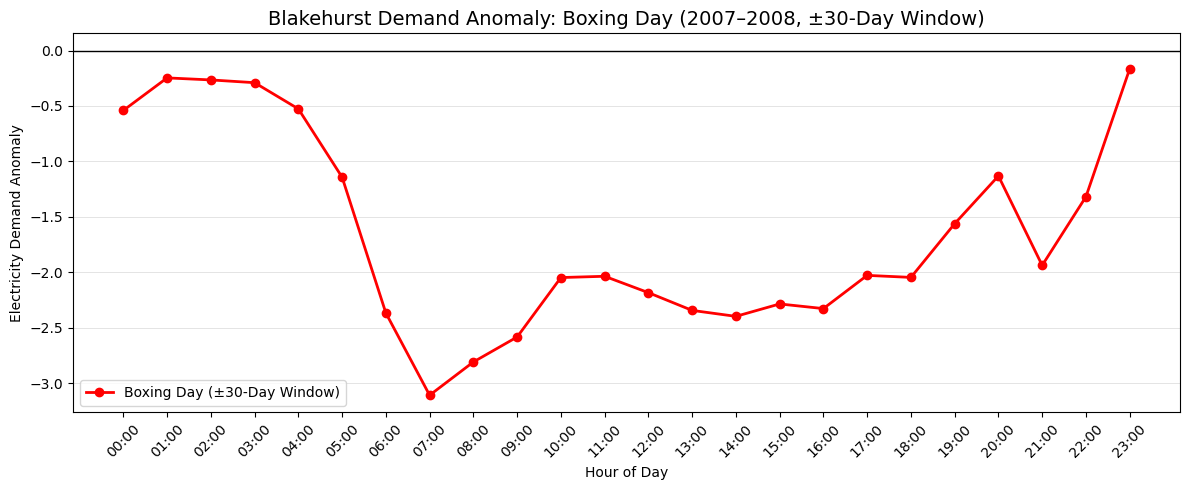

✅ Plotted Boxing Day for [2007, 2008]


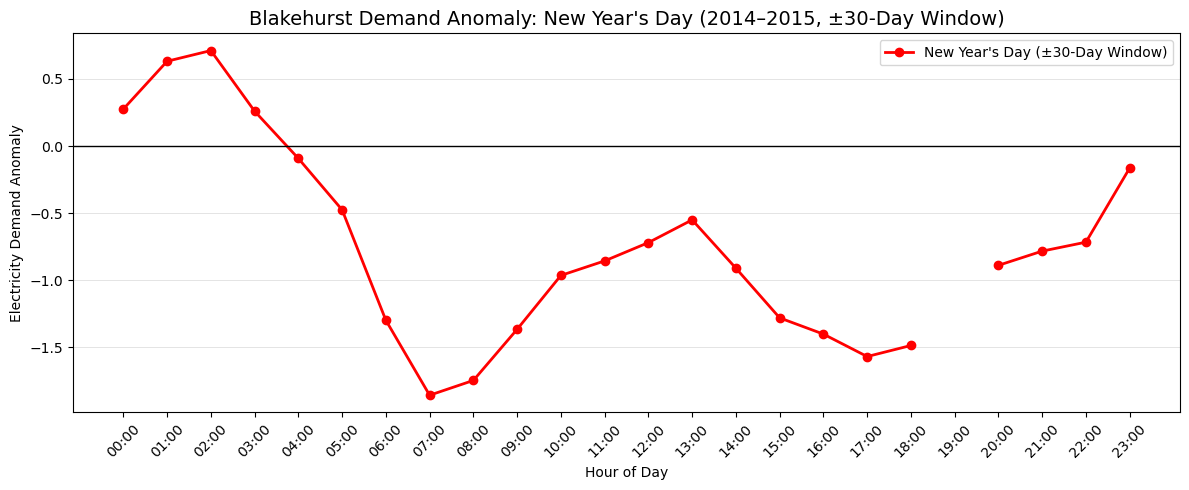

✅ Plotted New Year's Day for [2014, 2015]


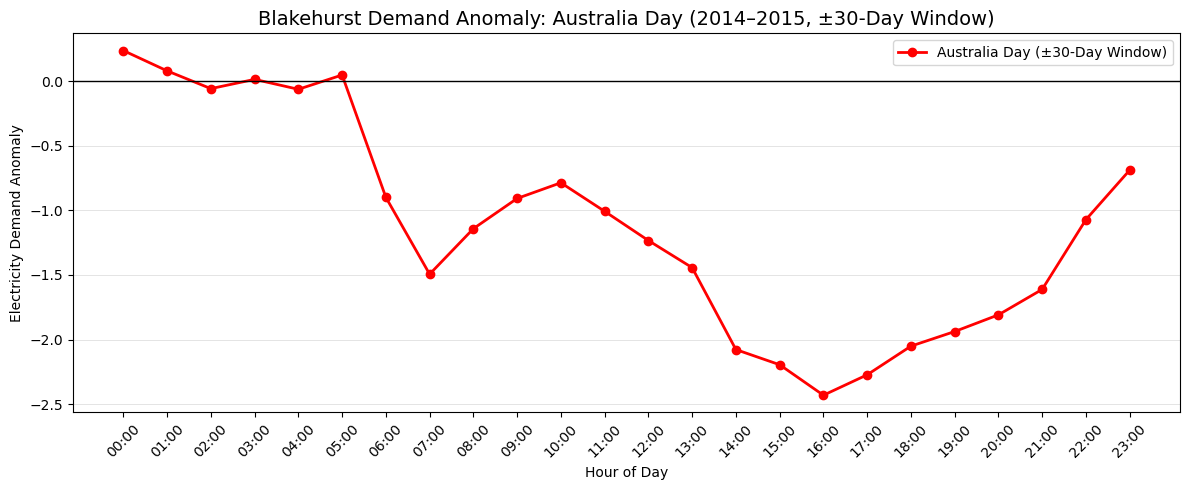

✅ Plotted Australia Day for [2014, 2015]


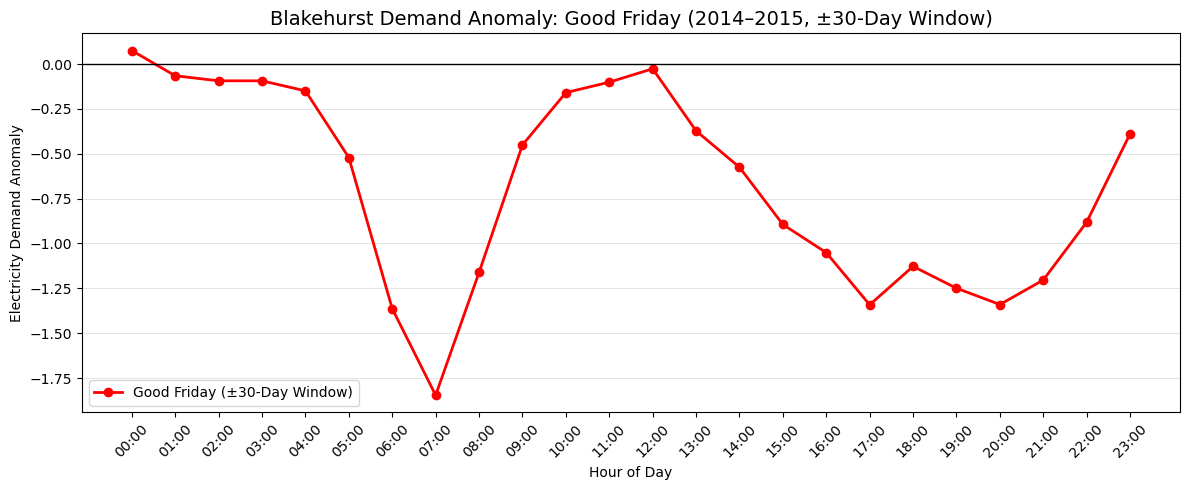

✅ Plotted Good Friday for [2014, 2015]


✅ Plotted Easter Saturday for [2014, 2015]


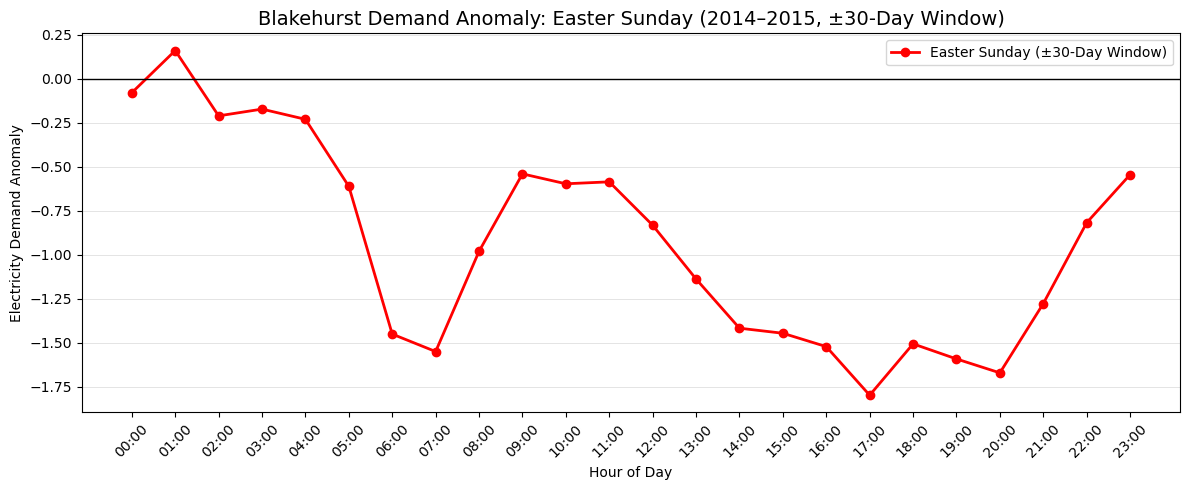

✅ Plotted Easter Sunday for [2014, 2015]


✅ Plotted Easter Monday for [2014, 2015]


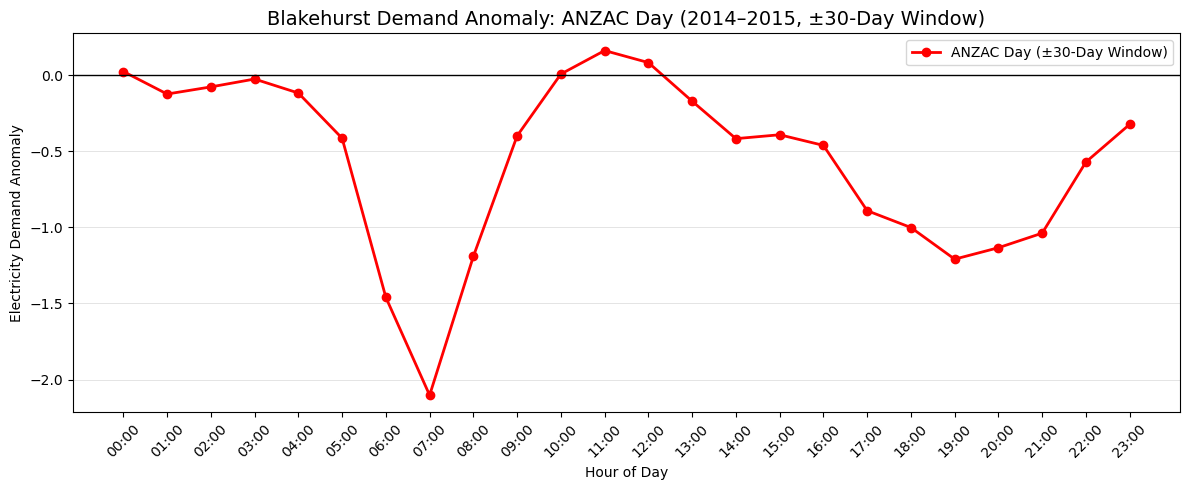

✅ Plotted ANZAC Day for [2014, 2015]


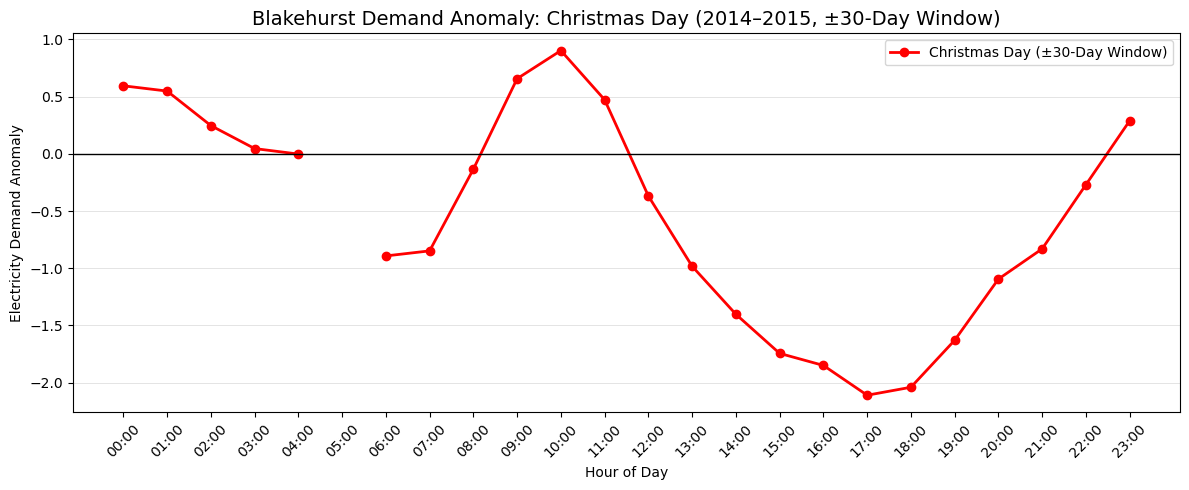

✅ Plotted Christmas Day for [2014, 2015]


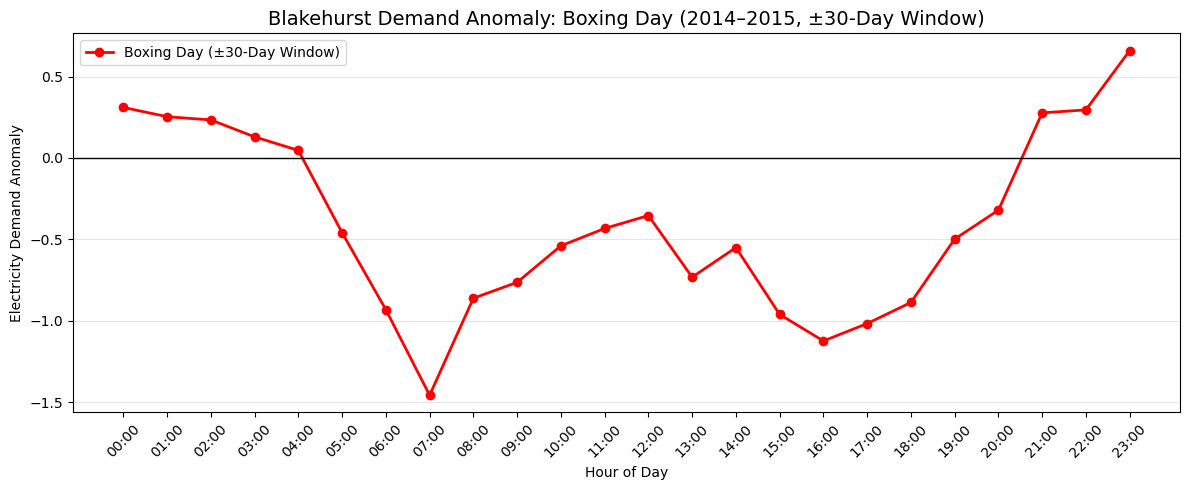

✅ Plotted Boxing Day for [2014, 2015]


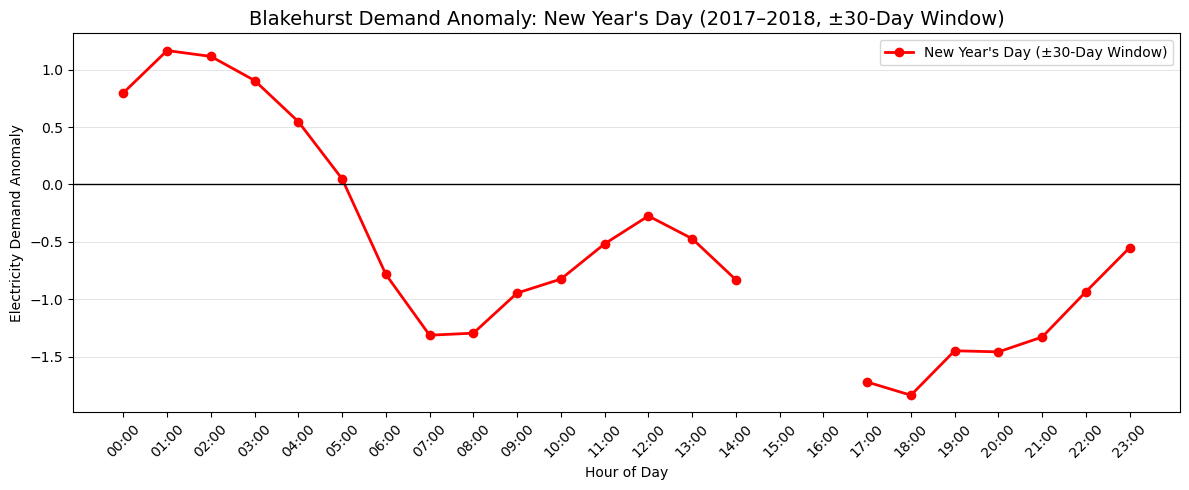

✅ Plotted New Year's Day for [2017, 2018]


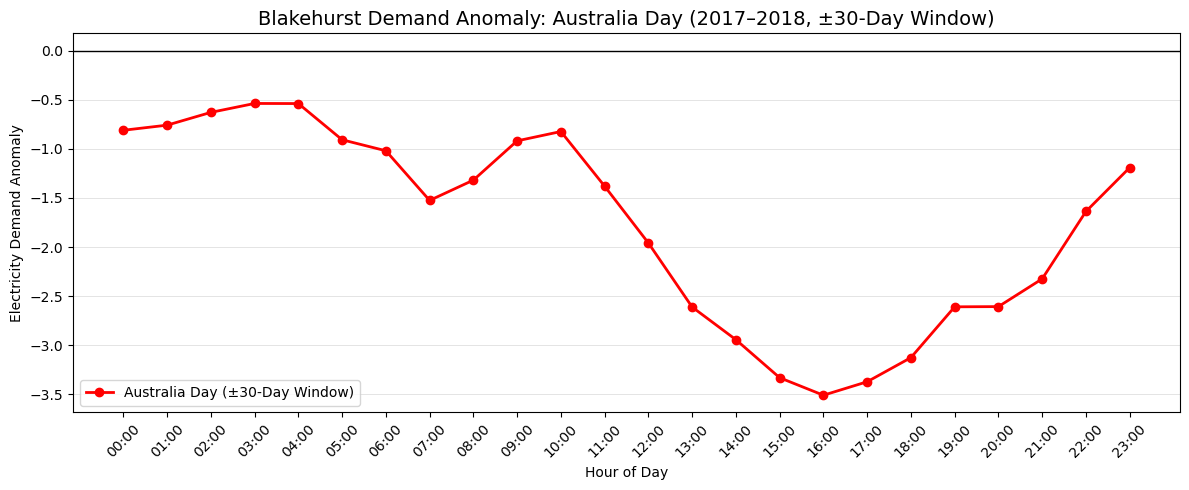

✅ Plotted Australia Day for [2017, 2018]


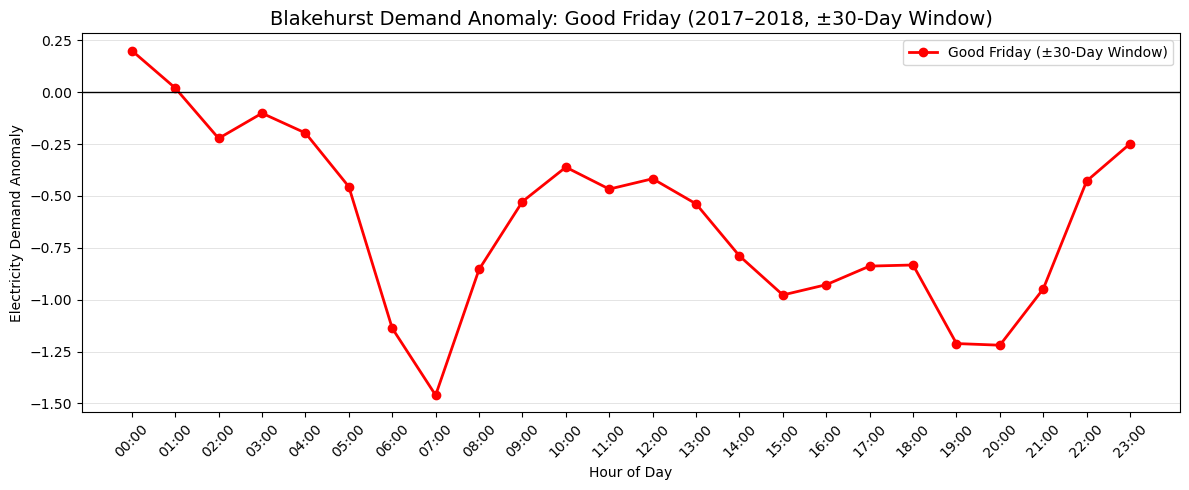

✅ Plotted Good Friday for [2017, 2018]


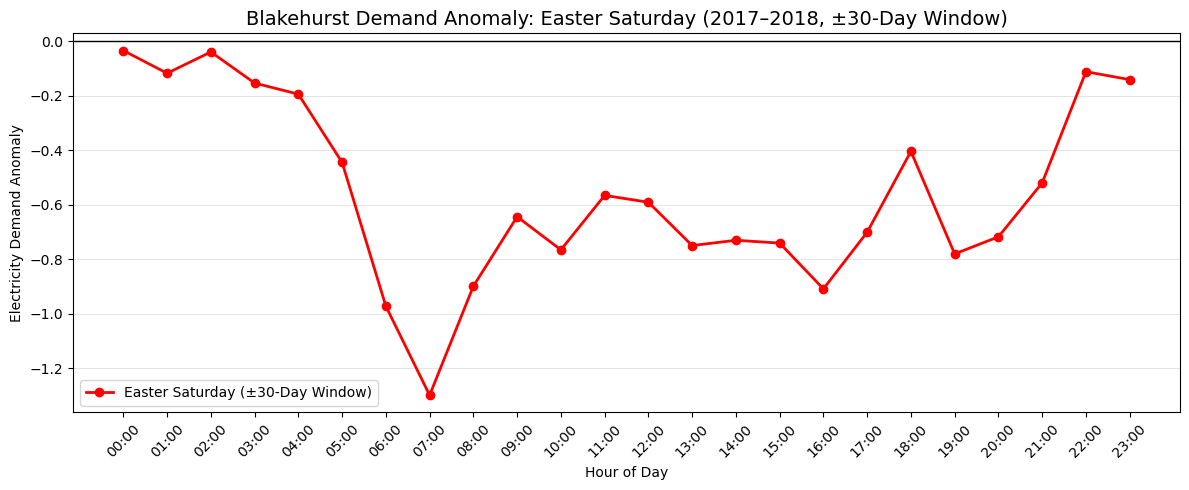

✅ Plotted Easter Saturday for [2017, 2018]


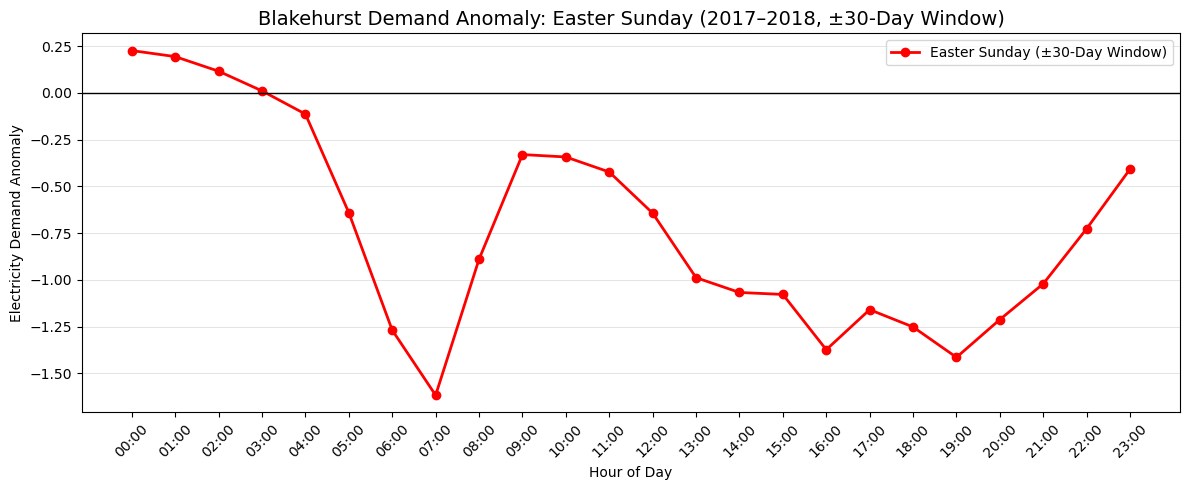

✅ Plotted Easter Sunday for [2017, 2018]


✅ Plotted Easter Monday for [2017, 2018]


✅ Plotted ANZAC Day for [2017, 2018]


✅ Plotted Christmas Day for [2017, 2018]


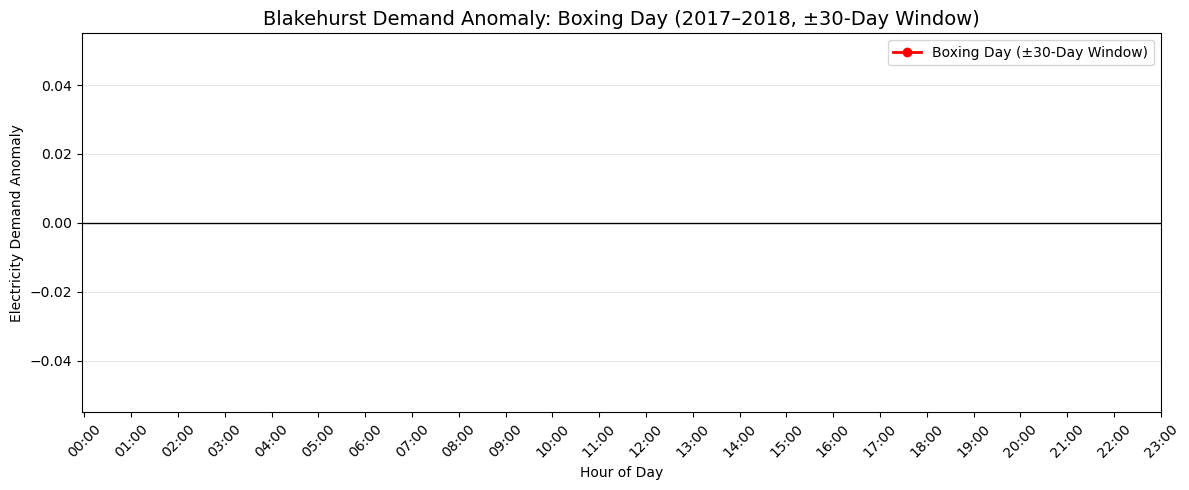

✅ Plotted Boxing Day for [2017, 2018]


In [7]:
# Define the station
station = "BLAKE"

# Define the year intervals you want to loop through
intervals = [
    [2004, 2005],
    [2007, 2008],
    [2014, 2015],
    [2017, 2018],  # Christmas and Boxing Day do not have data for 2017-2018
]

# Define all national public holidays (including moving ones like Easter)
holidays = {
    "New Year's Day": lambda y: pd.Timestamp(f"{y}-01-01"),
    "Australia Day": lambda y: pd.Timestamp(f"{y}-01-26"),
    "Good Friday": lambda y: pd.Timestamp(easter(y)) - pd.Timedelta(days=2),
    "Easter Saturday": lambda y: pd.Timestamp(easter(y)) - pd.Timedelta(days=1),
    "Easter Sunday": lambda y: pd.Timestamp(easter(y)),
    "Easter Monday": lambda y: pd.Timestamp(easter(y)) + pd.Timedelta(days=1),
    "ANZAC Day": lambda y: pd.Timestamp(f"{y}-04-25"),
    "Christmas Day": lambda y: pd.Timestamp(f"{y}-12-25"),
    "Boxing Day": lambda y: pd.Timestamp(f"{y}-12-26"),
}

# Loop through intervals and holidays
for years in intervals:
    for holiday_name, holiday_func in holidays.items():
        try:
            compare_holiday_only_window(
                demand, info, station, years,
                holiday_func=holiday_func,
                holiday_name=holiday_name
            )
            print(f"✅ Plotted {holiday_name} for {years}")
        except Exception as e:
            print(f"⚠️ Plotted {holiday_name} for {years} (with NaNs or incomplete data): {e}")

# Comparing Demand Anomalies: Weekday, Weekends and the Public Holiday
- baseline demand profile by nhour
- anomalies for each group relative to hour-speific baseline

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from dateutil.easter import easter

# --- Define year intervals ---
intervals = [[y, y+1] for y in range(2004, 2018)]  # 2004-2005 up to 2017-2018

# --- Define holidays ---
holidays = {
    "New Year's Day": lambda y: pd.Timestamp(f"{y}-01-01"),
    "Australia Day": lambda y: pd.Timestamp(f"{y}-01-26"),
    "Good Friday": lambda y: pd.Timestamp(easter(y)) - pd.Timedelta(days=2),
    "Easter Saturday": lambda y: pd.Timestamp(easter(y)) - pd.Timedelta(days=1),
    "Easter Sunday": lambda y: pd.Timestamp(easter(y)),
    "Easter Monday": lambda y: pd.Timestamp(easter(y)) + pd.Timedelta(days=1),
    "ANZAC Day": lambda y: pd.Timestamp(f"{y}-04-25"),
    "Christmas Day": lambda y: pd.Timestamp(f"{y}-12-25"),
    "Boxing Day": lambda y: pd.Timestamp(f"{y}-12-26"),
}

# --- Function: holiday-only anomaly plot ---
def holiday_anomaly_plot(demand, info, station, years, holiday_func, holiday_name):
    demand.index = pd.to_datetime(demand.index)
    hourly = demand[[station]].resample("h").mean()

    # Collect ±30-day windows
    windows = []
    for year in years:
        ref_date = holiday_func(year)
        start = ref_date - pd.Timedelta(days=30)
        end   = ref_date + pd.Timedelta(days=30)
        window = hourly.loc[start:end].copy()
        windows.append(window)

    combined = pd.concat(windows)
    combined["hour"] = combined.index.hour
    baseline_by_hour = combined.groupby("hour")[station].mean()
    combined["anomaly"] = combined[station] - combined["hour"].map(baseline_by_hour)

    # Extract holiday profile
    holiday_hours = []
    for year in years:
        ref_date = holiday_func(year)
        expected_hours = pd.date_range(ref_date, ref_date + pd.Timedelta(hours=23), freq="h")
        daily = combined["anomaly"].reindex(expected_hours)
        daily.index = range(24)
        holiday_hours.append(daily)

    holiday_profile = pd.concat(holiday_hours, axis=1).mean(axis=1)

    # Plot
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(holiday_profile.index, holiday_profile.values, color="red", marker="o", linewidth=2,
            label=f"{holiday_name}")
    ax.axhline(0, color="black", linewidth=1)
    ax.set_xticks(range(24))
    ax.set_xticklabels([f"{h:02d}:00" for h in range(24)], rotation=45)
    full_name = info.loc[station, "Name"]
    ax.set_title(f"{full_name} Demand Anomaly: {holiday_name} ({years[0]}–{years[-1]})")
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Electricity Demand Anomaly")
    ax.legend()
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)
    return fig

# --- Function: weekday vs weekend vs holiday plot ---
def weekday_weekend_holiday_plot(demand, info, station, years, holiday_func, holiday_name):
    demand.index = pd.to_datetime(demand.index)
    hourly = demand[[station]].resample("h").mean()

    # Collect ±30-day windows
    windows = []
    for year in years:
        ref_date = holiday_func(year)
        start = ref_date - pd.Timedelta(days=30)
        end   = ref_date + pd.Timedelta(days=30)
        window = hourly.loc[start:end].copy()
        windows.append(window)

#calculating the hour-stratified baseline
    
    combined = pd.concat(windows)
    combined["hour"] = combined.index.hour
    combined["weekday"] = combined.index.weekday
    baseline_by_hour = combined.groupby("hour")[station].mean()
    combined["anomaly"] = combined[station] - combined["hour"].map(baseline_by_hour)

    # Weekday vs weekend profiles
    weekday_profile = combined[combined["weekday"] < 5].groupby("hour")["anomaly"].mean()
    weekend_profile = combined[combined["weekday"] >= 5].groupby("hour")["anomaly"].mean()

    # Holiday profile
    holiday_hours = []
    for year in years:
        ref_date = holiday_func(year)
        expected_hours = pd.date_range(ref_date, ref_date + pd.Timedelta(hours=23), freq="h")
        daily = combined["anomaly"].reindex(expected_hours)
        daily.index = range(24)
        holiday_hours.append(daily)
    holiday_profile = pd.concat(holiday_hours, axis=1).mean(axis=1)

    # Plot
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(weekday_profile.index, weekday_profile.values, color="blue", marker="o", linewidth=2,
            label="Weekdays (Mon–Fri)")
    ax.plot(weekend_profile.index, weekend_profile.values, color="green", marker="s", linewidth=2,
            label="Weekends (Sat–Sun)")
    ax.plot(holiday_profile.index, holiday_profile.values, color="red", marker="^", linewidth=2,
            label=f"{holiday_name}")
    ax.axhline(0, color="black", linewidth=1)
    ax.set_xticks(range(24))
    ax.set_xticklabels([f"{h:02d}:00" for h in range(24)], rotation=45)
    full_name = info.loc[station, "Name"]
    ax.set_title(f"{full_name} Demand Anomaly: {holiday_name} vs Weekday/Weekend ({years[0]}–{years[-1]})")
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Electricity Demand Anomaly")
    ax.legend()
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)
    return fig

# --- Main loop ---
output_dir = "/home/565/pv3484/aus_substation_electricity/figures/anomaly_demand"
os.makedirs(output_dir, exist_ok=True)

for station in demand.columns:
    station_dir = os.path.join(output_dir, station)
    os.makedirs(station_dir, exist_ok=True)

    for holiday_name, holiday_func in holidays.items():
        pdf_path = os.path.join(station_dir, f"{station}_{holiday_name.replace(' ', '_')}.pdf")

        # --- Skip if already created ---
        if os.path.exists(pdf_path):
            print(f"⏩ Skipping {pdf_path} (already done)")
            continue

        with PdfPages(pdf_path) as pdf:
            for years in intervals:
                try:
                    fig1 = holiday_anomaly_plot(demand, info, station, years, holiday_func, holiday_name)
                    pdf.savefig(fig1)
                    plt.close(fig1)

                    fig2 = weekday_weekend_holiday_plot(demand, info, station, years, holiday_func, holiday_name)
                    pdf.savefig(fig2)
                    plt.close(fig2)

                    print(f"✅ Added {holiday_name} {years} for {station} to {pdf_path}")
                except Exception as e:
                    print(f"⚠️ Skipped {holiday_name} {years} for {station}: {e}")

⏩ Skipping /home/565/pv3484/aus_substation_electricity/figures/anomaly_demand/BLAKE/BLAKE_New_Year's_Day.pdf (already done)
⏩ Skipping /home/565/pv3484/aus_substation_electricity/figures/anomaly_demand/BLAKE/BLAKE_Australia_Day.pdf (already done)
⏩ Skipping /home/565/pv3484/aus_substation_electricity/figures/anomaly_demand/BLAKE/BLAKE_Good_Friday.pdf (already done)
⏩ Skipping /home/565/pv3484/aus_substation_electricity/figures/anomaly_demand/BLAKE/BLAKE_Easter_Saturday.pdf (already done)
⏩ Skipping /home/565/pv3484/aus_substation_electricity/figures/anomaly_demand/BLAKE/BLAKE_Easter_Sunday.pdf (already done)
⏩ Skipping /home/565/pv3484/aus_substation_electricity/figures/anomaly_demand/BLAKE/BLAKE_Easter_Monday.pdf (already done)
⏩ Skipping /home/565/pv3484/aus_substation_electricity/figures/anomaly_demand/BLAKE/BLAKE_ANZAC_Day.pdf (already done)
⏩ Skipping /home/565/pv3484/aus_substation_electricity/figures/anomaly_demand/BLAKE/BLAKE_Christmas_Day.pdf (already done)
⏩ Skipping /home/56

## Using function
- the function now has a loop code imbedded, don't need to use this when using above

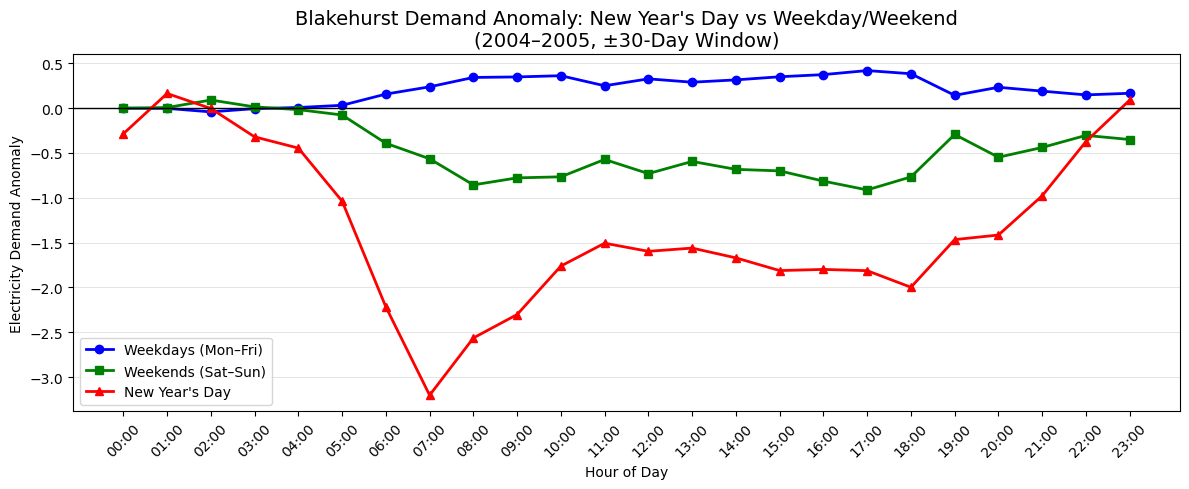

✅ Plotted New Year's Day for [2004, 2005]


✅ Plotted Australia Day for [2004, 2005]


✅ Plotted Good Friday for [2004, 2005]


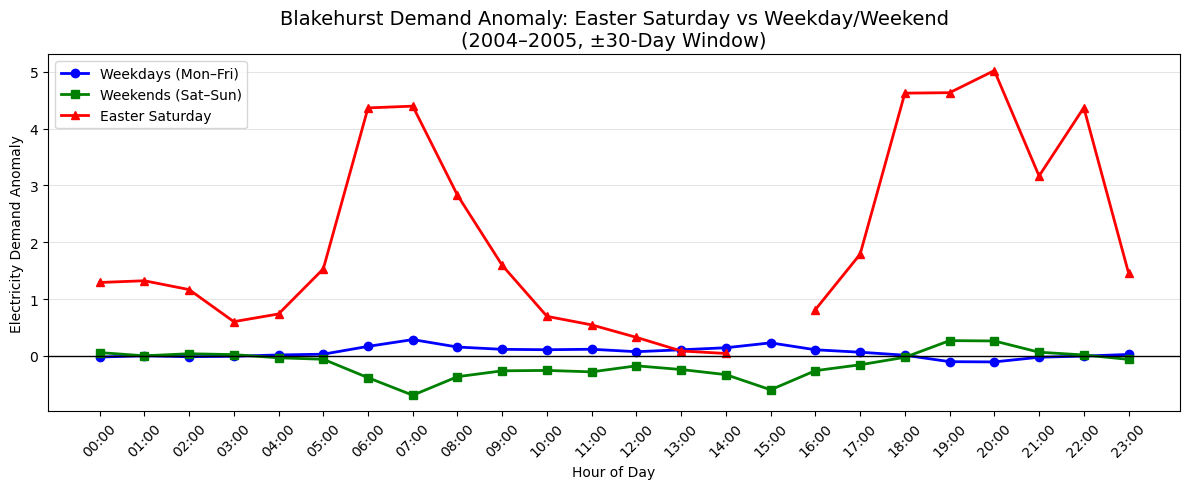

✅ Plotted Easter Saturday for [2004, 2005]


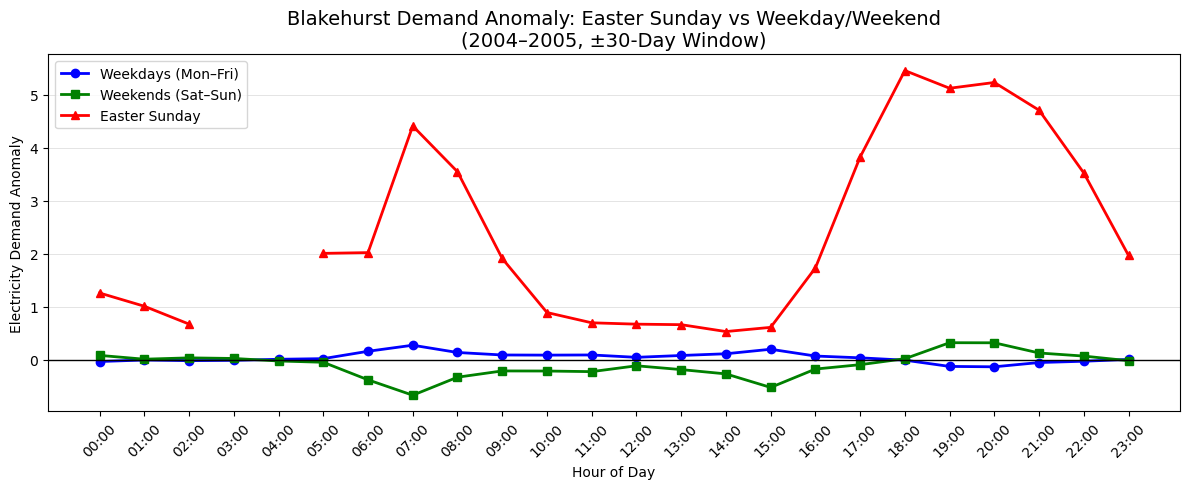

✅ Plotted Easter Sunday for [2004, 2005]


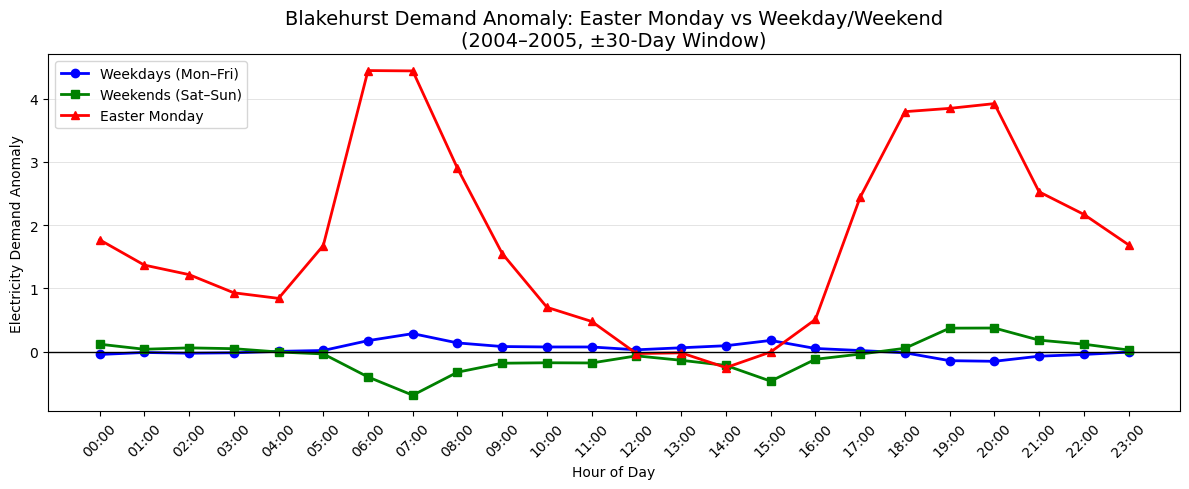

✅ Plotted Easter Monday for [2004, 2005]


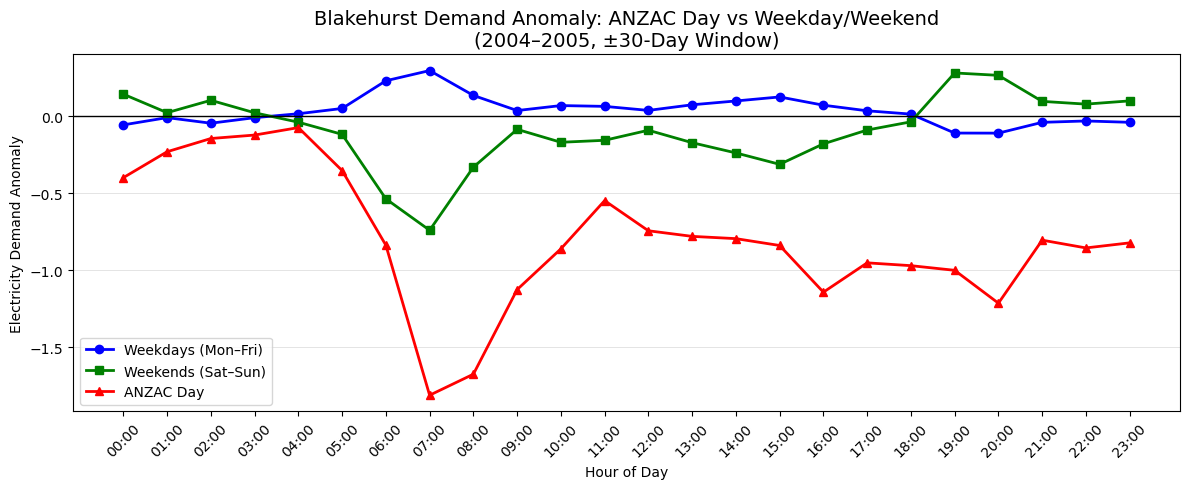

✅ Plotted ANZAC Day for [2004, 2005]


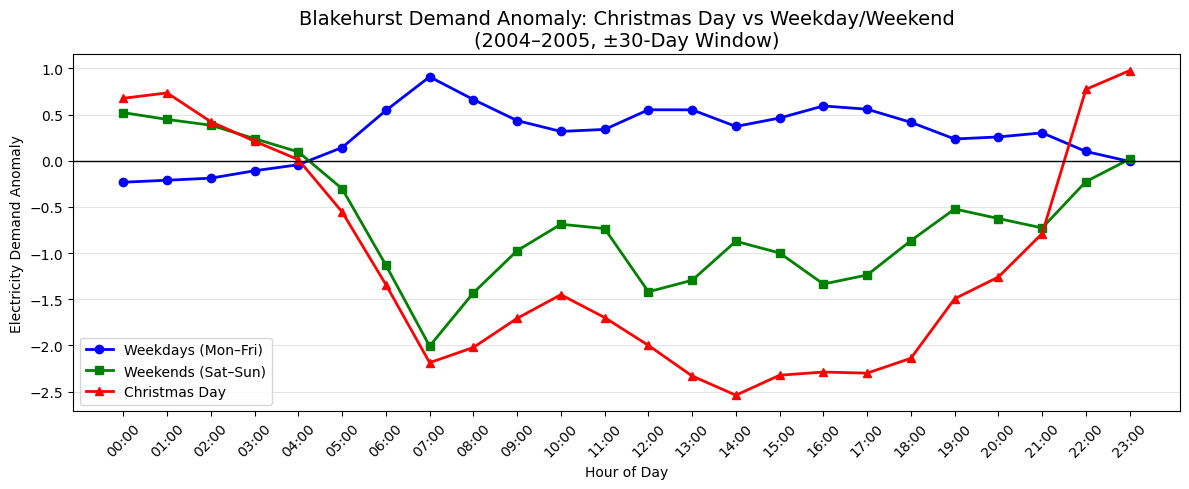

✅ Plotted Christmas Day for [2004, 2005]


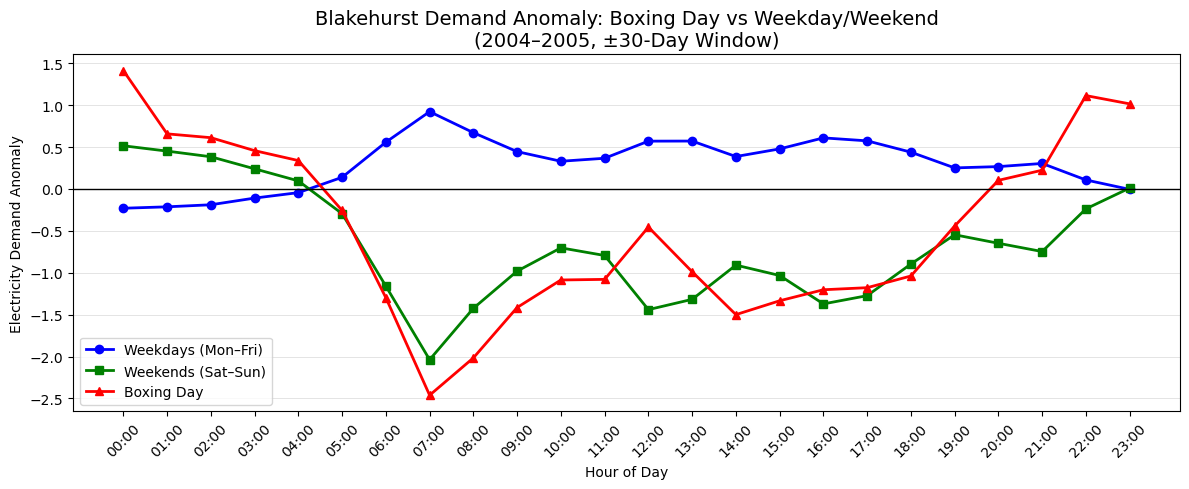

✅ Plotted Boxing Day for [2004, 2005]


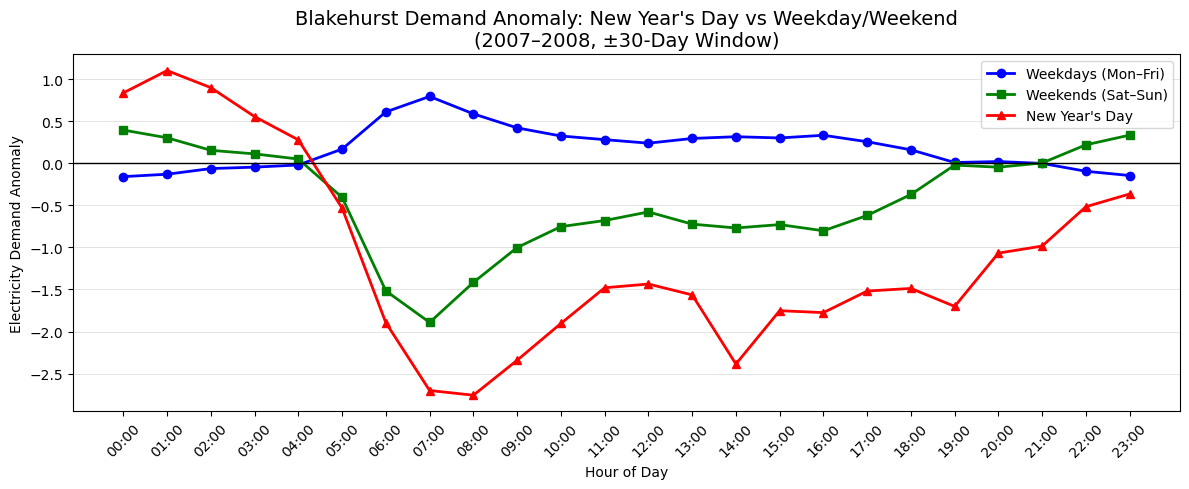

✅ Plotted New Year's Day for [2007, 2008]


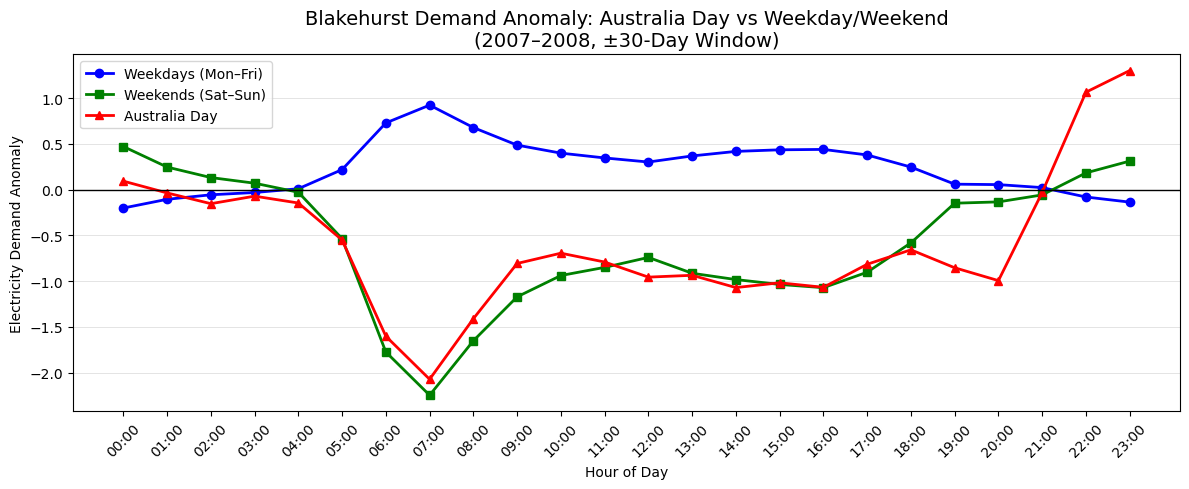

✅ Plotted Australia Day for [2007, 2008]


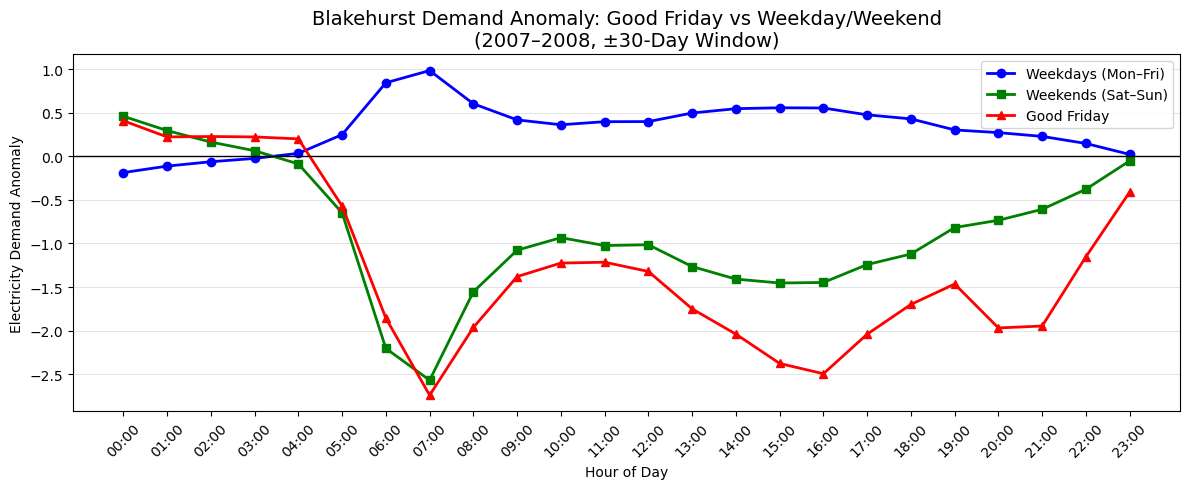

✅ Plotted Good Friday for [2007, 2008]


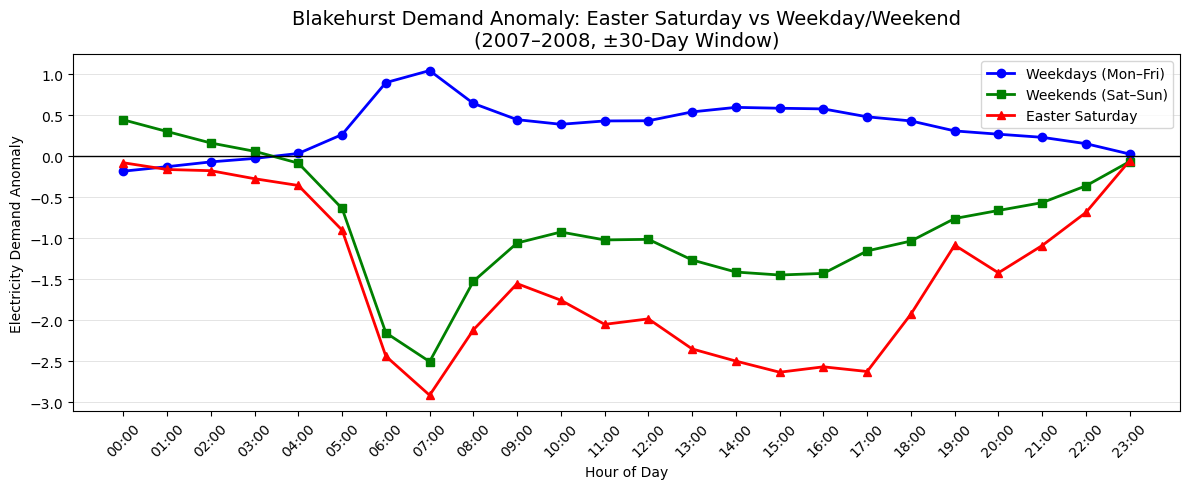

✅ Plotted Easter Saturday for [2007, 2008]


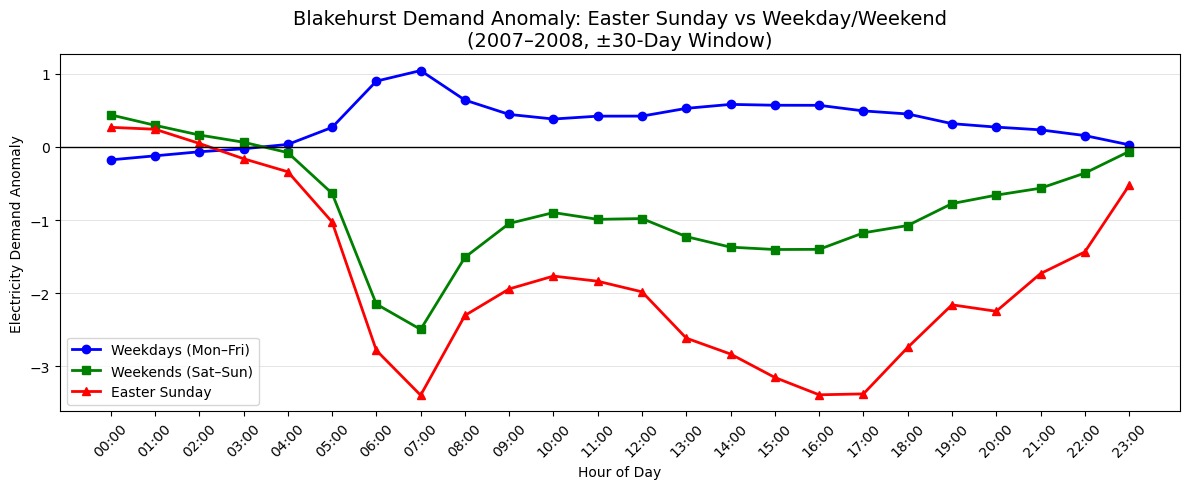

✅ Plotted Easter Sunday for [2007, 2008]


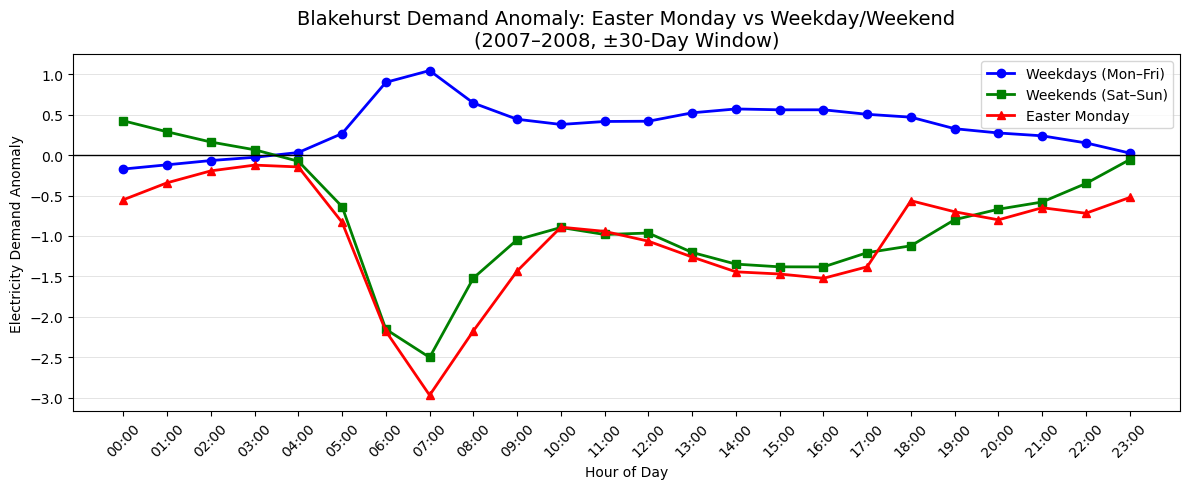

✅ Plotted Easter Monday for [2007, 2008]


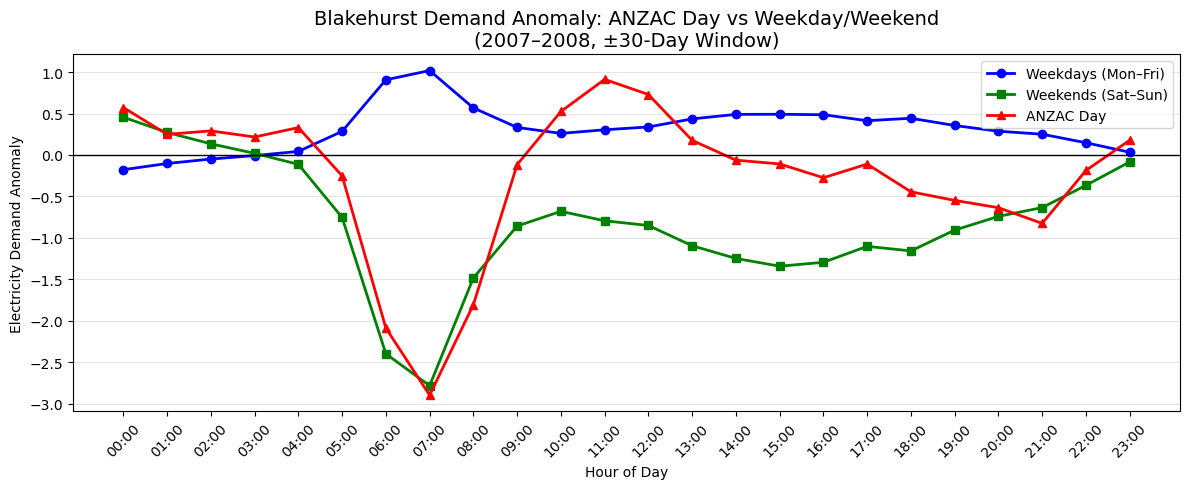

✅ Plotted ANZAC Day for [2007, 2008]


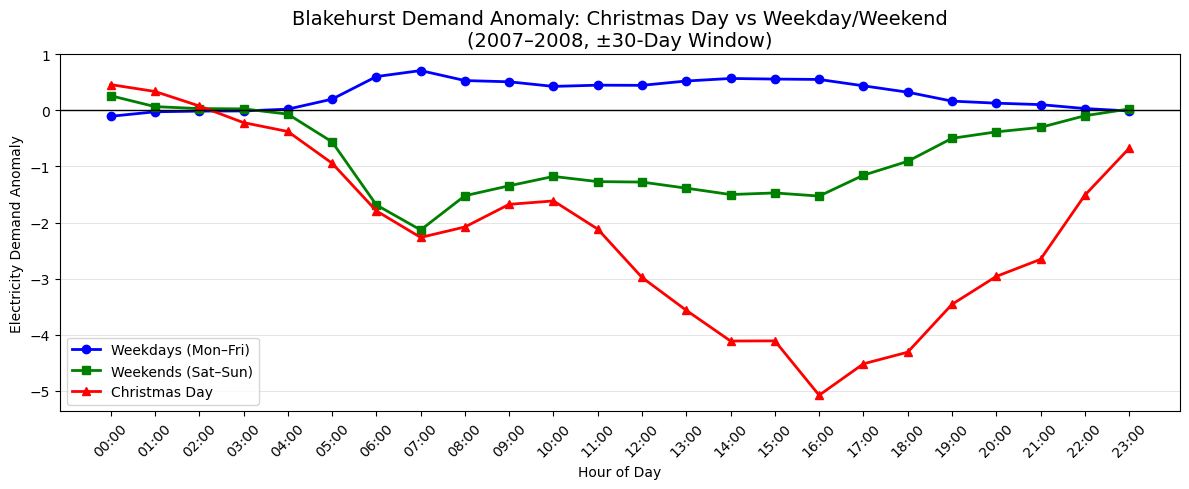

✅ Plotted Christmas Day for [2007, 2008]


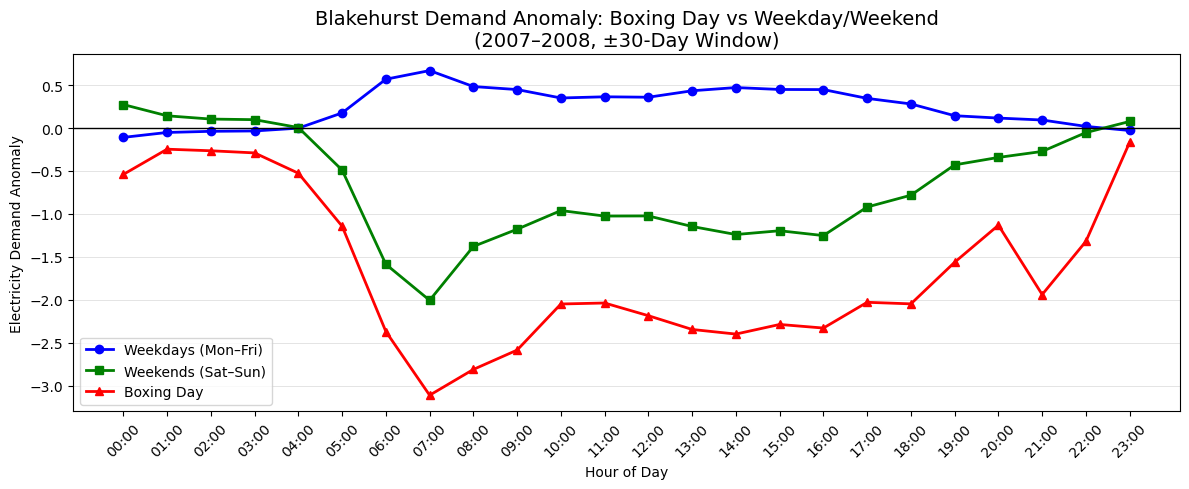

✅ Plotted Boxing Day for [2007, 2008]


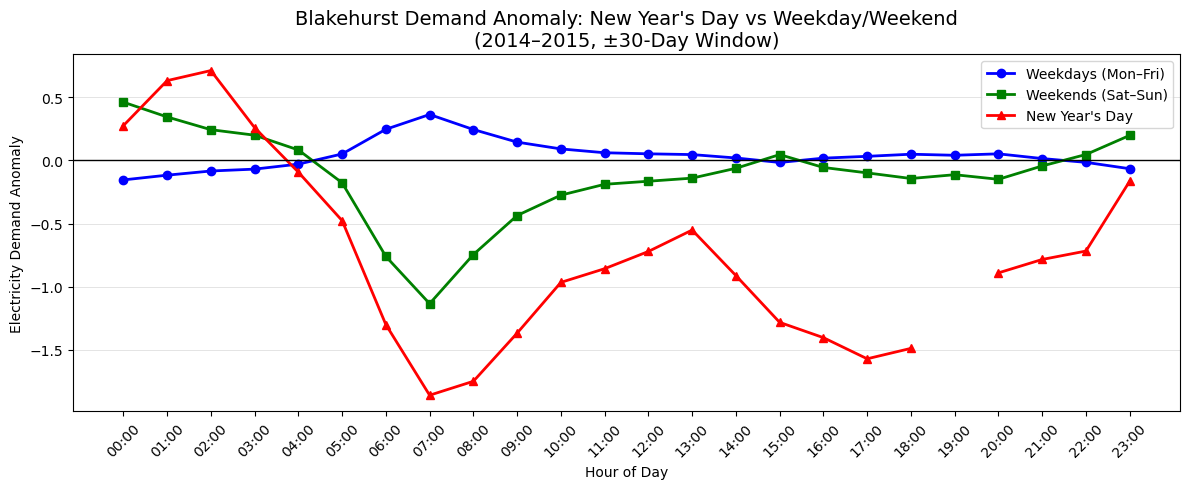

✅ Plotted New Year's Day for [2014, 2015]


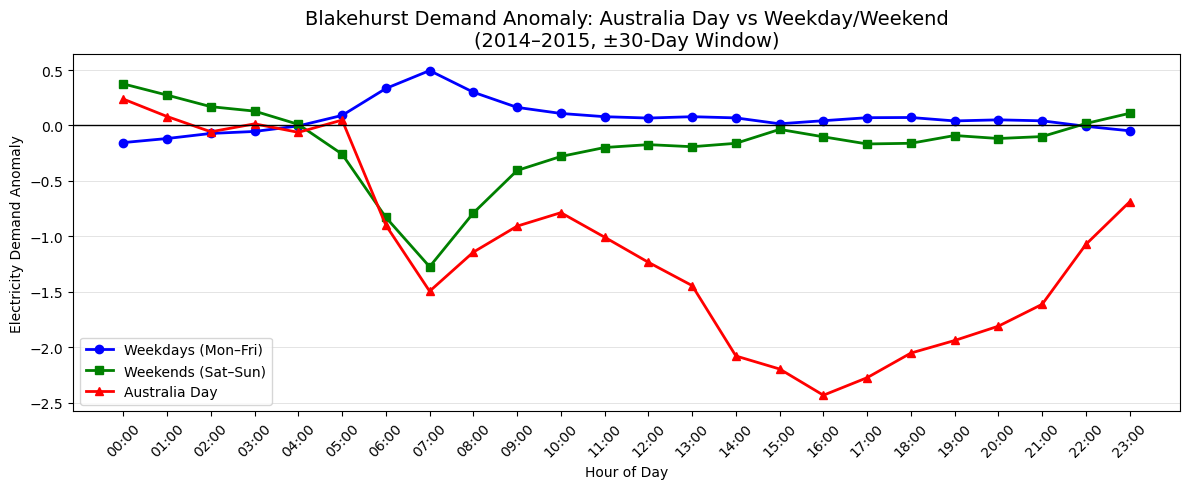

✅ Plotted Australia Day for [2014, 2015]


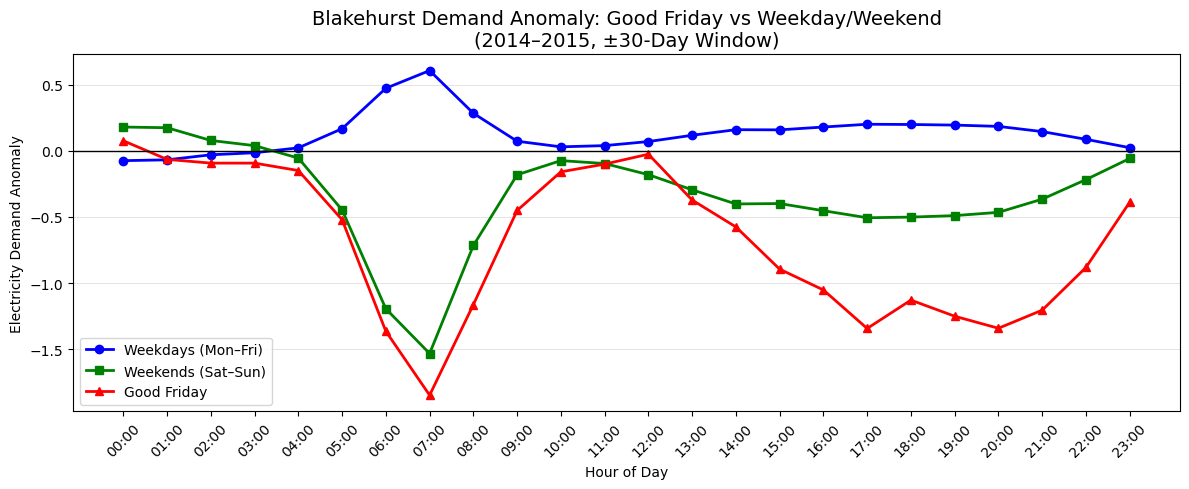

✅ Plotted Good Friday for [2014, 2015]


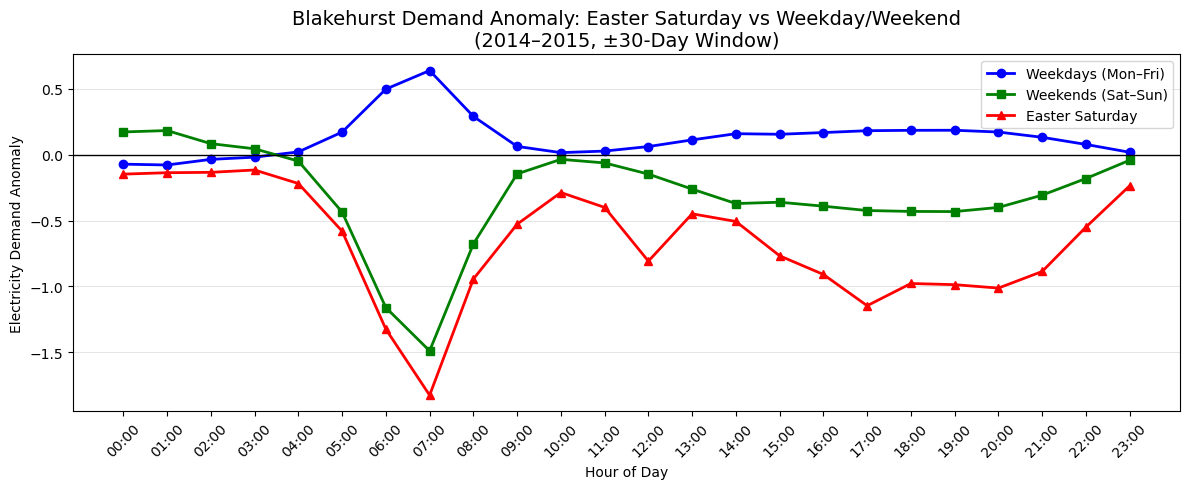

✅ Plotted Easter Saturday for [2014, 2015]


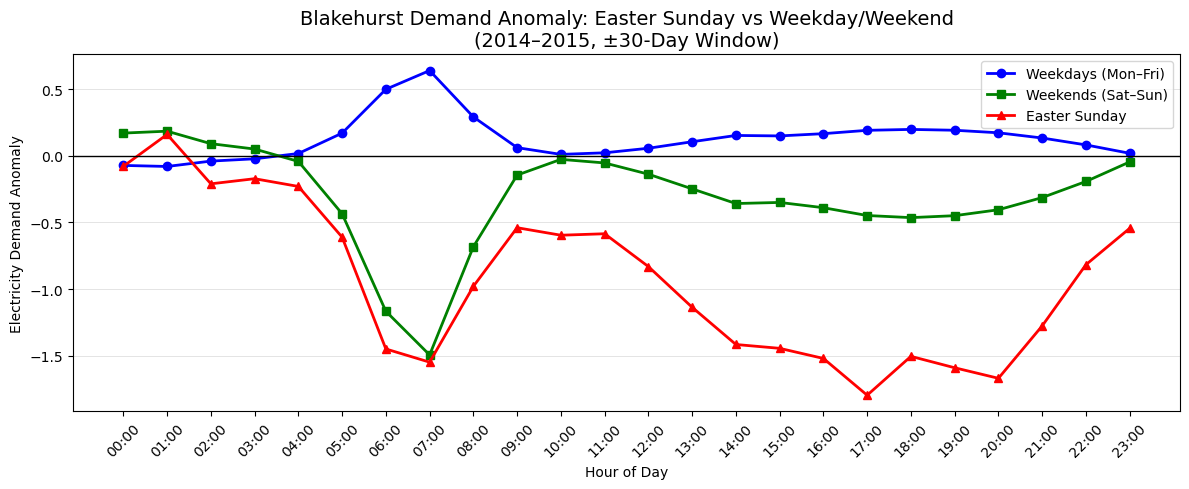

✅ Plotted Easter Sunday for [2014, 2015]


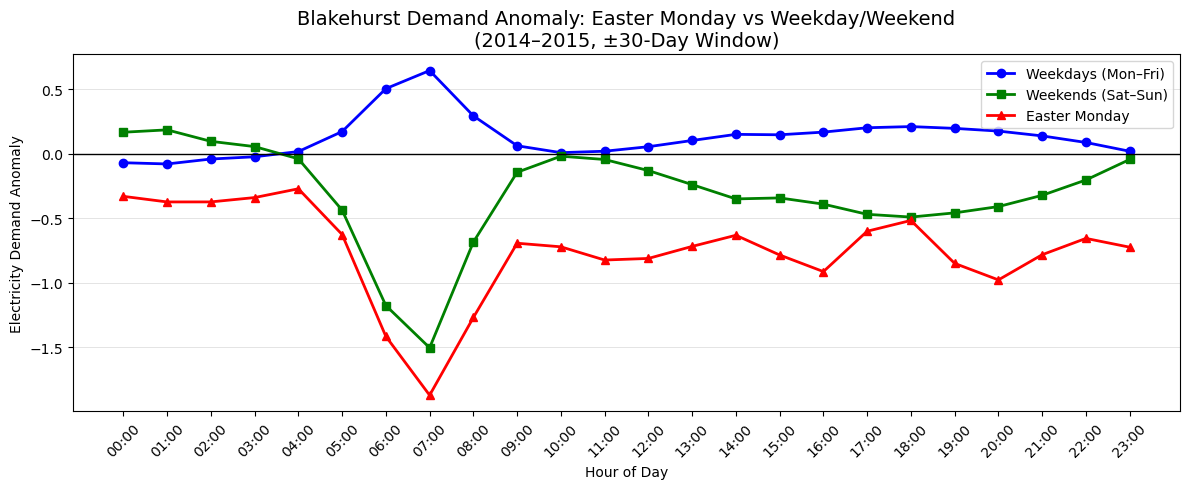

✅ Plotted Easter Monday for [2014, 2015]


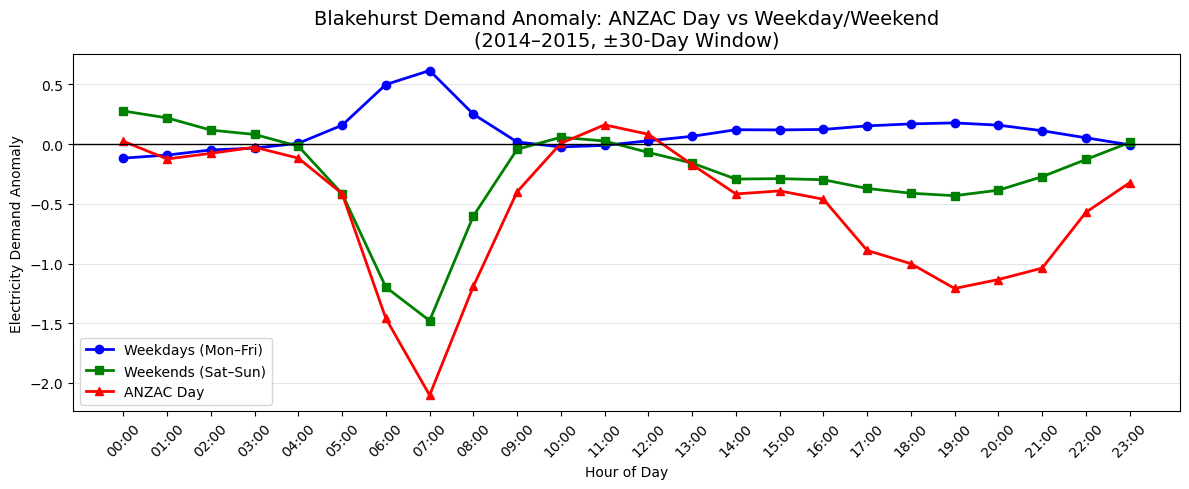

✅ Plotted ANZAC Day for [2014, 2015]


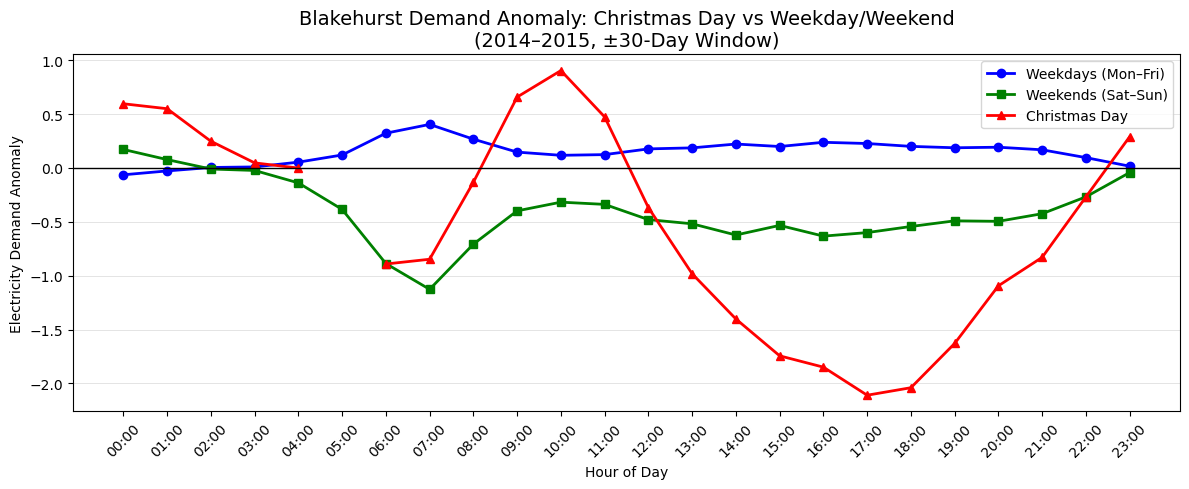

✅ Plotted Christmas Day for [2014, 2015]


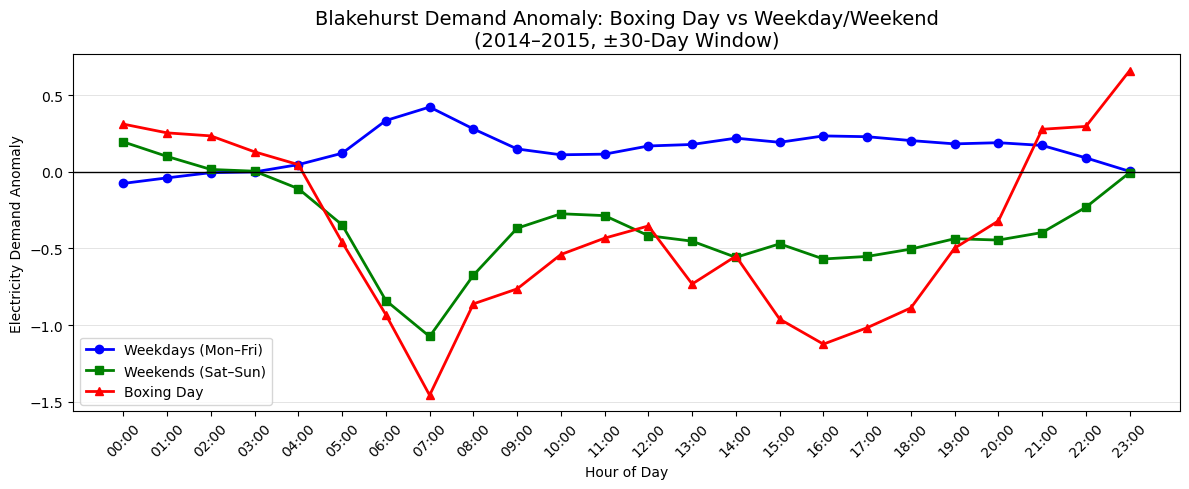

✅ Plotted Boxing Day for [2014, 2015]


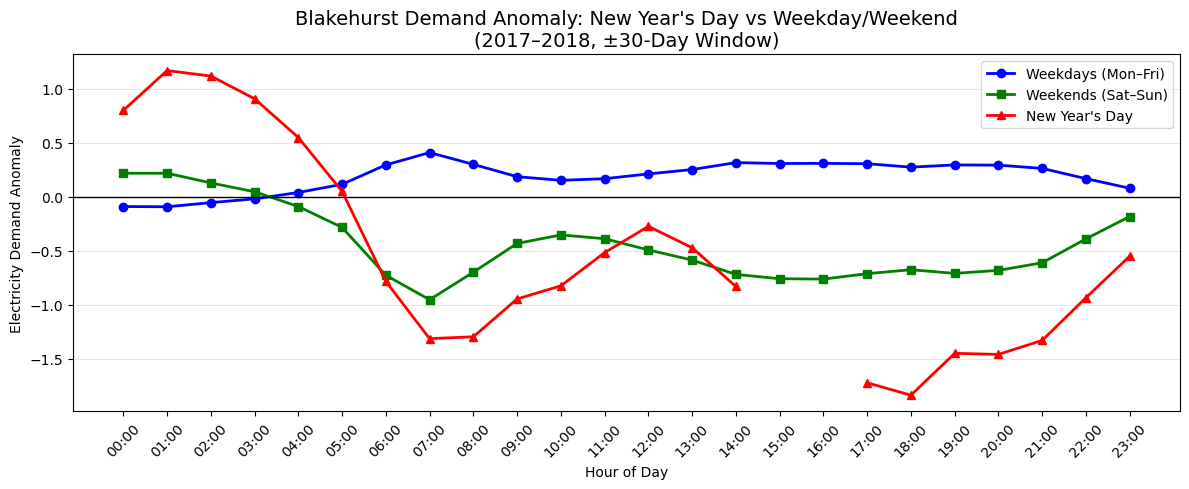

✅ Plotted New Year's Day for [2017, 2018]


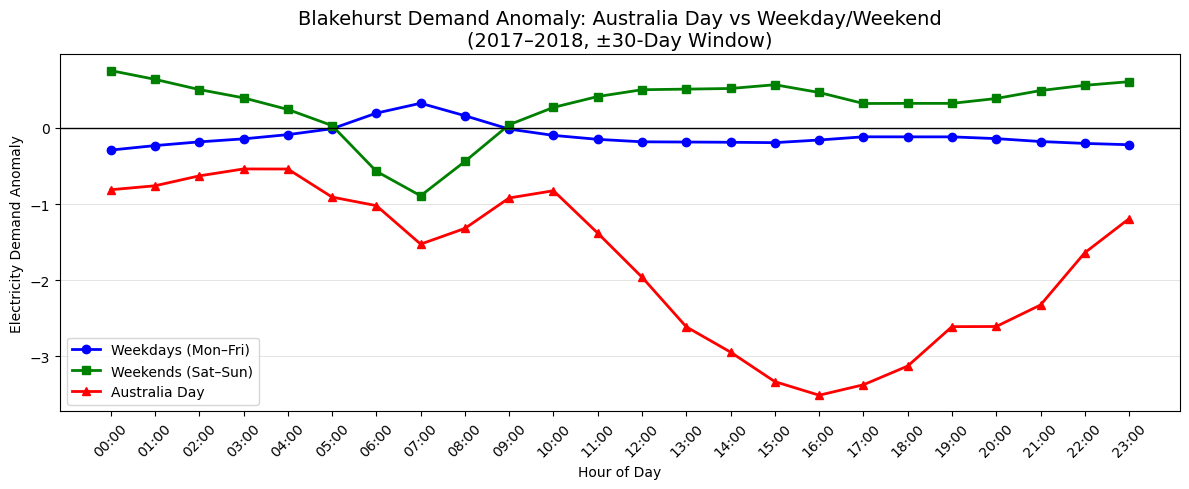

✅ Plotted Australia Day for [2017, 2018]


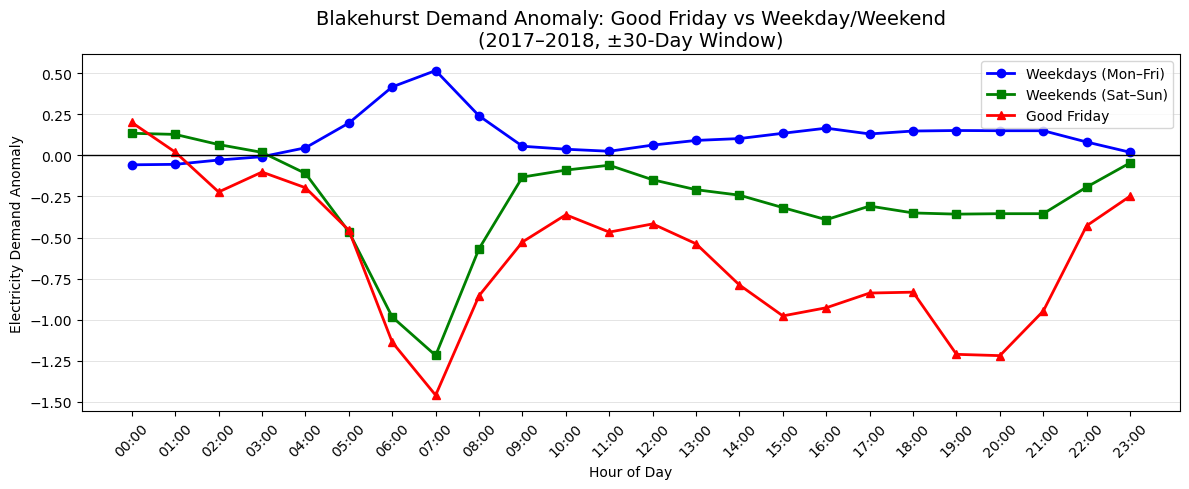

✅ Plotted Good Friday for [2017, 2018]


✅ Plotted Easter Saturday for [2017, 2018]


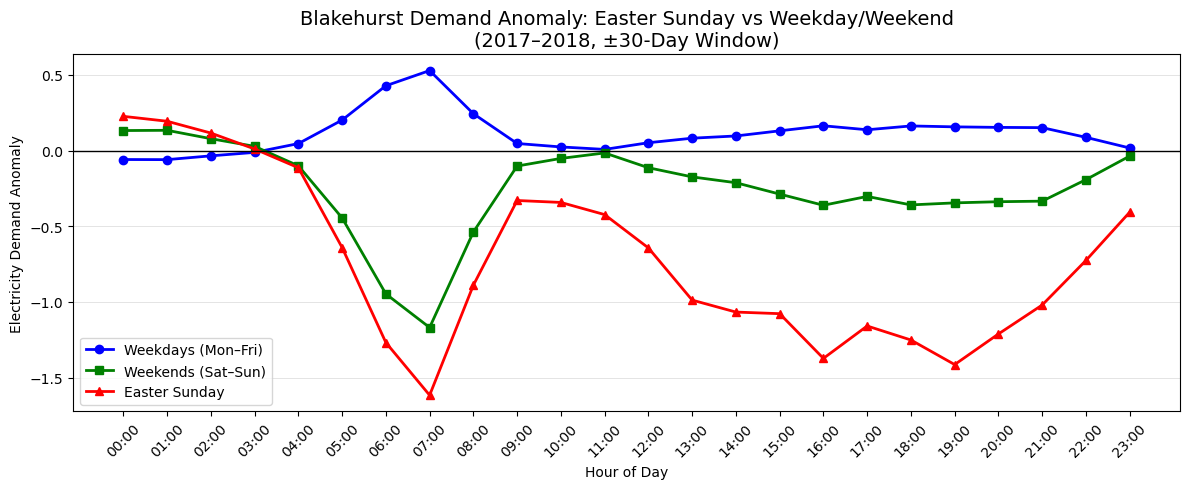

✅ Plotted Easter Sunday for [2017, 2018]


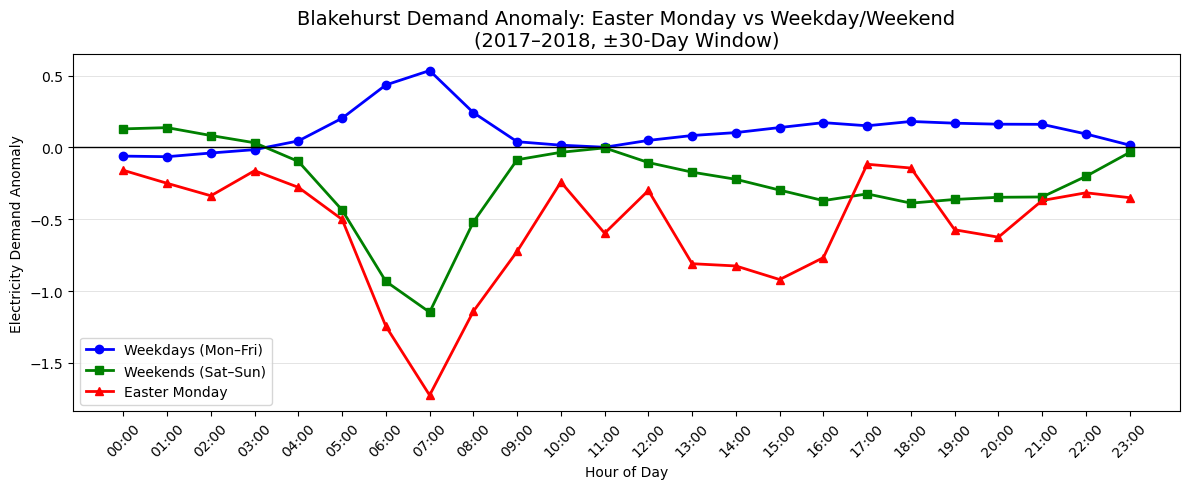

✅ Plotted Easter Monday for [2017, 2018]


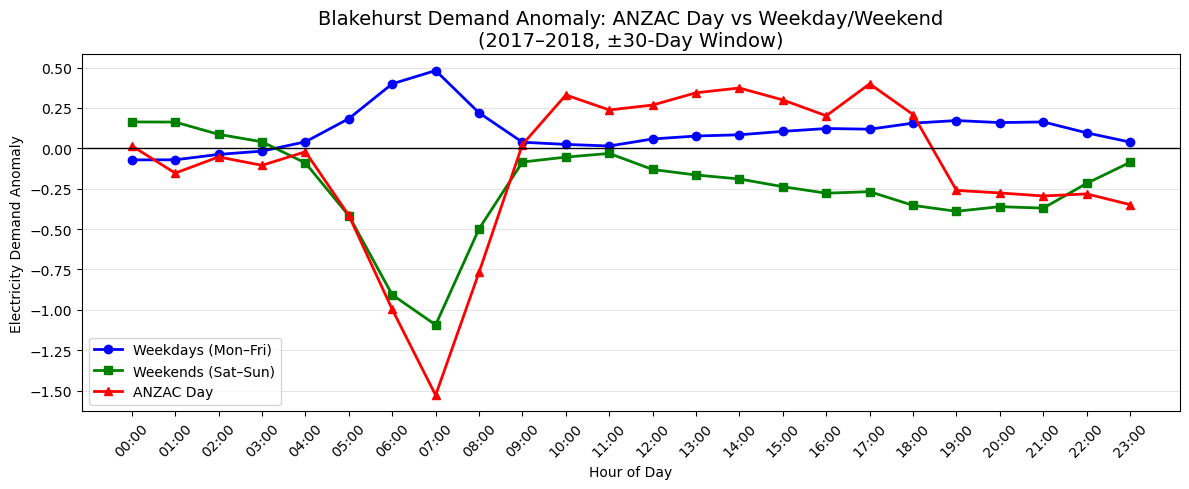

✅ Plotted ANZAC Day for [2017, 2018]


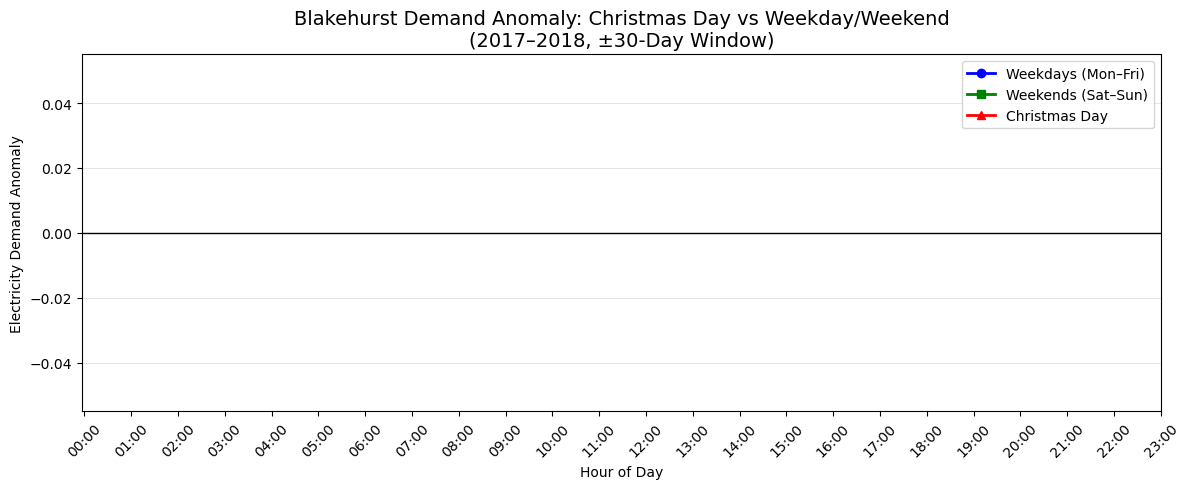

✅ Plotted Christmas Day for [2017, 2018]


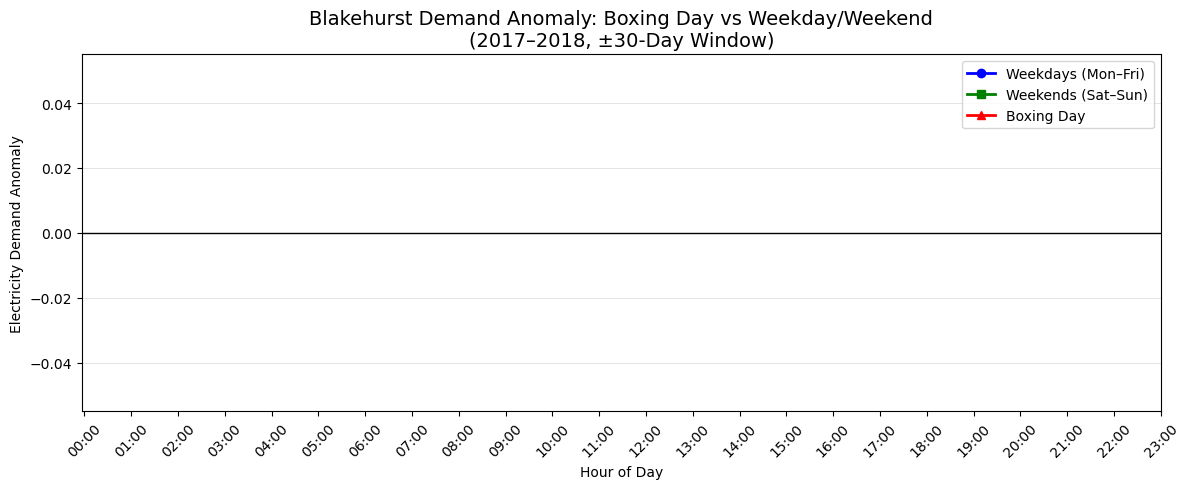

✅ Plotted Boxing Day for [2017, 2018]


In [10]:
# Define the station
station = "BLAKE"

# Define the year intervals you want to loop through
intervals = [
    [2004, 2005],
    [2007, 2008],
    [2014, 2015],
    [2017, 2018],  # Christmas and Boxing Day do not have data for 2017-2018
]

# Define all national public holidays (including moving ones like Easter)
holidays = {
    "New Year's Day": lambda y: pd.Timestamp(f"{y}-01-01"),
    "Australia Day": lambda y: pd.Timestamp(f"{y}-01-26"),
    "Good Friday": lambda y: pd.Timestamp(easter(y)) - pd.Timedelta(days=2),
    "Easter Saturday": lambda y: pd.Timestamp(easter(y)) - pd.Timedelta(days=1),
    "Easter Sunday": lambda y: pd.Timestamp(easter(y)),
    "Easter Monday": lambda y: pd.Timestamp(easter(y)) + pd.Timedelta(days=1),
    "ANZAC Day": lambda y: pd.Timestamp(f"{y}-04-25"),
    "Christmas Day": lambda y: pd.Timestamp(f"{y}-12-25"),
    "Boxing Day": lambda y: pd.Timestamp(f"{y}-12-26"),
}

# Base directory for saving plots
save_dir = "/home/565/pv3484/aus_substation_electricity/figures/anomaly_demand"

# Loop through intervals and holidays
for years in intervals:
    for holiday_name, holiday_func in holidays.items():
        try:            
            # --- Weekday vs Weekend vs Holiday comparison plot ---
            compare_weekday_weekend_holiday_window(
                demand, info, station, years,
                holiday_func=holiday_func,
                holiday_name=holiday_name,
                save_dir=os.path.join(save_dir, f"{years[0]}_{years[-1]}")
            )
            
            print(f"✅ Plotted {holiday_name} for {years}")
        
        except Exception as e:
            print(f"⚠️ Plotted {holiday_name} for {years} (with NaNs or incomplete data): {e}")